In [1]:
import sys
sys.path.insert(1, 'source')

FORCE = False

In [2]:
from util import getHash

name = 'FNN-Classification-Simple'

props={
    'path'          : 'source/data',
    'seed'          : 42,
    'split'         : 0.8,
    'test_split'    : 0.5,
    'control'       : False,
    'huntington'    : True,
    'left'          : True,
    'right'         : False,
    'threshold'     : 0.6,
    'binarize'      : True,
    'not_connected' : True,
    'single'        : None,
    'target'        : True,
    'roi'           : False,
    'brain'         : False,
    'features'      : [],
    'features_vox'  : [],
    #'radiomics'     : ['b10','b25','b50','b75'],
    #'radiomics_vox' : ['k5_b25','k7_b25','k9_b25','k11_b25'],
    'radiomics'     : ['b25'],
    'radiomics_vox' : ['k5_b25'],
    'balance_data'  : True,
    'debug'         : False,
    'targets_all'   : False,
    'collapse_max'  : False,
    'extras'        : None,
    'pca'           : 0.95,
    'pca_parts'     : 'target',
}

architecture={
    'activation'    : 'sigmoid',
    'layers'        : [1024,512,256,128],
    'loss'          : 'CCE',
    'learning_rate' : 0.001,
    'batch_size'    : 100000,
    'patience'      : 10,
}

HASH = getHash(name,[architecture,props])
print(HASH)

FNN-Classification-Simple-sigmoid_100000_1024512256128_0001_CCE_10_1_1_0_0_0_0_None___1_1_1_sourcedata_095_target_b25_k5_b25_0_0_42_None_08_1_0_05_06


In [3]:
from DataGeneratorClassificationFNN import DataGenerator

gen = DataGenerator(**props)
train, val, test = gen.getData()

print('train')
print(train[0].shape)
print(train[1].shape)
print('validation')
print(val[0].shape)
print(val[1].shape)
print('test')
print(test[0].shape)
print(test[1].shape)

train
(1601030, 106)
(1601030, 8)
validation
(238212, 106)
(238212, 8)
test
(194359, 106)
(194359, 8)


In [4]:
from ModelClassificationFNN import *
from tensorflow.keras.optimizers import Adam

stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=architecture['patience'],
)
save = tf.keras.callbacks.ModelCheckpoint(
    filepath='source/data/models/{}.weights.h5'.format(HASH),
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    save_weights_only=True,
)

model = buildModel(train[0].shape[1], train[1].shape[1], activation=architecture['activation'], layers=architecture['layers'])

model.compile(loss=locals()[architecture['loss']], optimizer=Adam(learning_rate=architecture['learning_rate']), jit_compile=True, metrics=[STD,MAE])

model.summary()

Model: "FFN"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 input_1 (InputLayer)        [(None, 106)]             0         


 dense (Dense)               (None, 1024)              109568    


 dense_1 (Dense)             (None, 512)               524800    


 dense_2 (Dense)             (None, 256)               131328    


 dense_3 (Dense)             (None, 128)               32896     


 dense_4 (Dense)             (None, 8)                 1032      


Total params: 799624 (3.05 MB)


Trainable params: 799624 (3.05 MB)


Non-trainable params: 0 (0.00 Byte)


_________________________________________________________________


In [5]:
import os
from util import pickleSave

if FORCE or not os.path.exists('source/data/models/{}.pkl'.format(HASH)):
    history = model.fit(DataWrapper(train,architecture['batch_size']),
        validation_data=DataWrapper(val,architecture['batch_size'],False),
        epochs=10000,
        verbose=1,
        callbacks = [save,stop],
    )
    pickleSave('source/data/models/{}.pkl'.format(HASH), history.history)

model.load_weights('source/data/models/{}.weights.h5'.format(HASH))

Epoch 1/10000


 1/17 [>.............................] - ETA: 1:19 - loss: 2.1491 - STD: 0.0515 - MAE: 0.2183

 2/17 [==>...........................] - ETA: 1s - loss: 2.1167 - STD: 0.0351 - MAE: 0.2184  

 3/17 [====>.........................] - ETA: 1s - loss: 2.1103 - STD: 0.0304 - MAE: 0.2186

 4/17 [======>.......................] - ETA: 1s - loss: 2.1090 - STD: 0.0291 - MAE: 0.2187

 5/17 [=======>......................] - ETA: 1s - loss: 2.1071 - STD: 0.0276 - MAE: 0.2187

 6/17 [=========>....................] - ETA: 0s - loss: 2.1042 - STD: 0.0256 - MAE: 0.2187

 7/17 [===========>..................] - ETA: 0s - loss: 2.1010 - STD: 0.0236 - MAE: 0.2187

 8/17 [=============>................] - ETA: 0s - loss: 2.0983 - STD: 0.0221 - MAE: 0.2187

 9/17 [==============>...............] - ETA: 0s - loss: 2.0965 - STD: 0.0215 - MAE: 0.2187

10/17 [================>.............] - ETA: 0s - loss: 2.0954 - STD: 0.0215 - MAE: 0.2187

11/17 [==================>...........] - ETA: 0s - loss: 2.0954 - STD: 0.0217 - MAE: 0.2187

12/17 [====================>.........] - ETA: 0s - loss: 2.0944 - STD: 0.0216 - MAE: 0.2186

13/17 [=====================>........] - ETA: 0s - loss: 2.0934 - STD: 0.0212 - MAE: 0.2186

14/17 [=======================>......] - ETA: 0s - loss: 2.0923 - STD: 0.0205 - MAE: 0.2186

15/17 [=========================>....] - ETA: 0s - loss: 2.0912 - STD: 0.0197 - MAE: 0.2186

16/17 [===========================>..] - ETA: 0s - loss: 2.0903 - STD: 0.0189 - MAE: 0.2186

17/17 [==============================] - ETA: 0s - loss: 2.0896 - STD: 0.0183 - MAE: 0.2186

17/17 [==============================] - 8s 209ms/step - loss: 2.0896 - STD: 0.0183 - MAE: 0.2186 - val_loss: 2.0811 - val_STD: 0.0096 - val_MAE: 0.2187


Epoch 2/10000


 1/17 [>.............................] - ETA: 2s - loss: 2.0801 - STD: 0.0095 - MAE: 0.2187

 2/17 [==>...........................] - ETA: 1s - loss: 2.0803 - STD: 0.0099 - MAE: 0.2187

 3/17 [====>.........................] - ETA: 1s - loss: 2.0803 - STD: 0.0098 - MAE: 0.2187

 5/17 [=======>......................] - ETA: 0s - loss: 2.0797 - STD: 0.0084 - MAE: 0.2187

 6/17 [=========>....................] - ETA: 0s - loss: 2.0792 - STD: 0.0079 - MAE: 0.2187

 7/17 [===========>..................] - ETA: 0s - loss: 2.0789 - STD: 0.0079 - MAE: 0.2187

 8/17 [=============>................] - ETA: 0s - loss: 2.0786 - STD: 0.0080 - MAE: 0.2187

 9/17 [==============>...............] - ETA: 0s - loss: 2.0784 - STD: 0.0084 - MAE: 0.2187

10/17 [================>.............] - ETA: 0s - loss: 2.0781 - STD: 0.0088 - MAE: 0.2186

11/17 [==================>...........] - ETA: 0s - loss: 2.0780 - STD: 0.0094 - MAE: 0.2186

12/17 [====================>.........] - ETA: 0s - loss: 2.0778 - STD: 0.0098 - MAE: 0.2186

13/17 [=====================>........] - ETA: 0s - loss: 2.0776 - STD: 0.0101 - MAE: 0.2186

14/17 [=======================>......] - ETA: 0s - loss: 2.0774 - STD: 0.0101 - MAE: 0.2186

15/17 [=========================>....] - ETA: 0s - loss: 2.0770 - STD: 0.0100 - MAE: 0.2186

16/17 [===========================>..] - ETA: 0s - loss: 2.0767 - STD: 0.0098 - MAE: 0.2186

17/17 [==============================] - ETA: 0s - loss: 2.0765 - STD: 0.0095 - MAE: 0.2186

17/17 [==============================] - 2s 90ms/step - loss: 2.0765 - STD: 0.0095 - MAE: 0.2186 - val_loss: 2.0718 - val_STD: 0.0052 - val_MAE: 0.2185


Epoch 3/10000


 1/17 [>.............................] - ETA: 2s - loss: 2.0717 - STD: 0.0050 - MAE: 0.2185

 2/17 [==>...........................] - ETA: 1s - loss: 2.0711 - STD: 0.0052 - MAE: 0.2185

 3/17 [====>.........................] - ETA: 1s - loss: 2.0704 - STD: 0.0055 - MAE: 0.2184

 4/17 [======>.......................] - ETA: 1s - loss: 2.0697 - STD: 0.0058 - MAE: 0.2184

 5/17 [=======>......................] - ETA: 1s - loss: 2.0689 - STD: 0.0062 - MAE: 0.2184

 6/17 [=========>....................] - ETA: 0s - loss: 2.0679 - STD: 0.0066 - MAE: 0.2183

 7/17 [===========>..................] - ETA: 0s - loss: 2.0668 - STD: 0.0071 - MAE: 0.2183

 8/17 [=============>................] - ETA: 0s - loss: 2.0657 - STD: 0.0076 - MAE: 0.2183

 9/17 [==============>...............] - ETA: 0s - loss: 2.0644 - STD: 0.0082 - MAE: 0.2182

10/17 [================>.............] - ETA: 0s - loss: 2.0629 - STD: 0.0087 - MAE: 0.2182

11/17 [==================>...........] - ETA: 0s - loss: 2.0613 - STD: 0.0092 - MAE: 0.2181

12/17 [====================>.........] - ETA: 0s - loss: 2.0595 - STD: 0.0096 - MAE: 0.2180

14/17 [=======================>......] - ETA: 0s - loss: 2.0569 - STD: 0.0107 - MAE: 0.2179

15/17 [=========================>....] - ETA: 0s - loss: 2.0543 - STD: 0.0115 - MAE: 0.2178

16/17 [===========================>..] - ETA: 0s - loss: 2.0513 - STD: 0.0123 - MAE: 0.2176

17/17 [==============================] - ETA: 0s - loss: 2.0482 - STD: 0.0132 - MAE: 0.2175

17/17 [==============================] - 2s 91ms/step - loss: 2.0482 - STD: 0.0132 - MAE: 0.2175 - val_loss: 1.9893 - val_STD: 0.0322 - val_MAE: 0.2148


Epoch 4/10000


 1/17 [>.............................] - ETA: 2s - loss: 1.9905 - STD: 0.0318 - MAE: 0.2149

 2/17 [==>...........................] - ETA: 1s - loss: 1.9875 - STD: 0.0339 - MAE: 0.2147

 3/17 [====>.........................] - ETA: 1s - loss: 1.9837 - STD: 0.0360 - MAE: 0.2144

 5/17 [=======>......................] - ETA: 0s - loss: 1.9781 - STD: 0.0401 - MAE: 0.2139

 6/17 [=========>....................] - ETA: 0s - loss: 1.9742 - STD: 0.0424 - MAE: 0.2136

 7/17 [===========>..................] - ETA: 0s - loss: 1.9703 - STD: 0.0444 - MAE: 0.2133

 8/17 [=============>................] - ETA: 0s - loss: 1.9669 - STD: 0.0462 - MAE: 0.2130

 9/17 [==============>...............] - ETA: 0s - loss: 1.9642 - STD: 0.0479 - MAE: 0.2127

10/17 [================>.............] - ETA: 0s - loss: 1.9619 - STD: 0.0494 - MAE: 0.2125

11/17 [==================>...........] - ETA: 0s - loss: 1.9603 - STD: 0.0507 - MAE: 0.2123

12/17 [====================>.........] - ETA: 0s - loss: 1.9584 - STD: 0.0520 - MAE: 0.2121

13/17 [=====================>........] - ETA: 0s - loss: 1.9566 - STD: 0.0531 - MAE: 0.2119

14/17 [=======================>......] - ETA: 0s - loss: 1.9548 - STD: 0.0541 - MAE: 0.2118

15/17 [=========================>....] - ETA: 0s - loss: 1.9534 - STD: 0.0551 - MAE: 0.2116

16/17 [===========================>..] - ETA: 0s - loss: 1.9522 - STD: 0.0559 - MAE: 0.2115

17/17 [==============================] - ETA: 0s - loss: 1.9510 - STD: 0.0565 - MAE: 0.2114

17/17 [==============================] - 2s 90ms/step - loss: 1.9510 - STD: 0.0565 - MAE: 0.2114 - val_loss: 1.9285 - val_STD: 0.0706 - val_MAE: 0.2090


Epoch 5/10000


 1/17 [>.............................] - ETA: 2s - loss: 1.9315 - STD: 0.0686 - MAE: 0.2093

 2/17 [==>...........................] - ETA: 1s - loss: 1.9312 - STD: 0.0680 - MAE: 0.2094

 3/17 [====>.........................] - ETA: 1s - loss: 1.9300 - STD: 0.0677 - MAE: 0.2094

 4/17 [======>.......................] - ETA: 1s - loss: 1.9296 - STD: 0.0678 - MAE: 0.2094

 5/17 [=======>......................] - ETA: 1s - loss: 1.9284 - STD: 0.0676 - MAE: 0.2094

 6/17 [=========>....................] - ETA: 0s - loss: 1.9277 - STD: 0.0673 - MAE: 0.2094

 7/17 [===========>..................] - ETA: 0s - loss: 1.9272 - STD: 0.0673 - MAE: 0.2094

 8/17 [=============>................] - ETA: 0s - loss: 1.9272 - STD: 0.0672 - MAE: 0.2094

 9/17 [==============>...............] - ETA: 0s - loss: 1.9266 - STD: 0.0672 - MAE: 0.2094

10/17 [================>.............] - ETA: 0s - loss: 1.9259 - STD: 0.0671 - MAE: 0.2094

11/17 [==================>...........] - ETA: 0s - loss: 1.9256 - STD: 0.0671 - MAE: 0.2094

12/17 [====================>.........] - ETA: 0s - loss: 1.9253 - STD: 0.0671 - MAE: 0.2094

13/17 [=====================>........] - ETA: 0s - loss: 1.9247 - STD: 0.0672 - MAE: 0.2094

14/17 [=======================>......] - ETA: 0s - loss: 1.9241 - STD: 0.0673 - MAE: 0.2093

15/17 [=========================>....] - ETA: 0s - loss: 1.9235 - STD: 0.0674 - MAE: 0.2093

16/17 [===========================>..] - ETA: 0s - loss: 1.9229 - STD: 0.0675 - MAE: 0.2093

17/17 [==============================] - 2s 90ms/step - loss: 1.9228 - STD: 0.0676 - MAE: 0.2092 - val_loss: 1.9060 - val_STD: 0.0703 - val_MAE: 0.2084


Epoch 6/10000


 1/17 [>.............................] - ETA: 2s - loss: 1.9162 - STD: 0.0688 - MAE: 0.2089

 2/17 [==>...........................] - ETA: 1s - loss: 1.9149 - STD: 0.0693 - MAE: 0.2087

 3/17 [====>.........................] - ETA: 1s - loss: 1.9129 - STD: 0.0692 - MAE: 0.2087

 4/17 [======>.......................] - ETA: 1s - loss: 1.9116 - STD: 0.0694 - MAE: 0.2086

 5/17 [=======>......................] - ETA: 1s - loss: 1.9107 - STD: 0.0697 - MAE: 0.2086

 6/17 [=========>....................] - ETA: 0s - loss: 1.9099 - STD: 0.0699 - MAE: 0.2085

 7/17 [===========>..................] - ETA: 0s - loss: 1.9092 - STD: 0.0700 - MAE: 0.2085

 8/17 [=============>................] - ETA: 0s - loss: 1.9085 - STD: 0.0702 - MAE: 0.2084

 9/17 [==============>...............] - ETA: 0s - loss: 1.9076 - STD: 0.0702 - MAE: 0.2084

10/17 [================>.............] - ETA: 0s - loss: 1.9069 - STD: 0.0701 - MAE: 0.2083

11/17 [==================>...........] - ETA: 0s - loss: 1.9062 - STD: 0.0701 - MAE: 0.2083

12/17 [====================>.........] - ETA: 0s - loss: 1.9057 - STD: 0.0701 - MAE: 0.2083

13/17 [=====================>........] - ETA: 0s - loss: 1.9049 - STD: 0.0700 - MAE: 0.2083

14/17 [=======================>......] - ETA: 0s - loss: 1.9046 - STD: 0.0701 - MAE: 0.2082

16/17 [===========================>..] - ETA: 0s - loss: 1.9040 - STD: 0.0703 - MAE: 0.2082

17/17 [==============================] - ETA: 0s - loss: 1.9033 - STD: 0.0704 - MAE: 0.2081

17/17 [==============================] - 2s 91ms/step - loss: 1.9033 - STD: 0.0704 - MAE: 0.2081 - val_loss: 1.8980 - val_STD: 0.0749 - val_MAE: 0.2071


Epoch 7/10000


 1/17 [>.............................] - ETA: 2s - loss: 1.8936 - STD: 0.0728 - MAE: 0.2074

 2/17 [==>...........................] - ETA: 1s - loss: 1.8943 - STD: 0.0726 - MAE: 0.2074

 3/17 [====>.........................] - ETA: 1s - loss: 1.8941 - STD: 0.0725 - MAE: 0.2074

 4/17 [======>.......................] - ETA: 1s - loss: 1.8926 - STD: 0.0730 - MAE: 0.2073

 5/17 [=======>......................] - ETA: 1s - loss: 1.8914 - STD: 0.0733 - MAE: 0.2072

 6/17 [=========>....................] - ETA: 0s - loss: 1.8906 - STD: 0.0736 - MAE: 0.2071

 7/17 [===========>..................] - ETA: 0s - loss: 1.8904 - STD: 0.0741 - MAE: 0.2070

 8/17 [=============>................] - ETA: 0s - loss: 1.8897 - STD: 0.0743 - MAE: 0.2070

 9/17 [==============>...............] - ETA: 0s - loss: 1.8894 - STD: 0.0745 - MAE: 0.2069

10/17 [================>.............] - ETA: 0s - loss: 1.8888 - STD: 0.0747 - MAE: 0.2069

11/17 [==================>...........] - ETA: 0s - loss: 1.8881 - STD: 0.0748 - MAE: 0.2068

12/17 [====================>.........] - ETA: 0s - loss: 1.8874 - STD: 0.0749 - MAE: 0.2068

13/17 [=====================>........] - ETA: 0s - loss: 1.8868 - STD: 0.0752 - MAE: 0.2067

14/17 [=======================>......] - ETA: 0s - loss: 1.8862 - STD: 0.0754 - MAE: 0.2067

15/17 [=========================>....] - ETA: 0s - loss: 1.8856 - STD: 0.0755 - MAE: 0.2066

16/17 [===========================>..] - ETA: 0s - loss: 1.8852 - STD: 0.0757 - MAE: 0.2066

17/17 [==============================] - 2s 91ms/step - loss: 1.8852 - STD: 0.0758 - MAE: 0.2066 - val_loss: 1.8813 - val_STD: 0.0793 - val_MAE: 0.2058


Epoch 8/10000


 1/17 [>.............................] - ETA: 2s - loss: 1.8767 - STD: 0.0778 - MAE: 0.2060

 2/17 [==>...........................] - ETA: 1s - loss: 1.8769 - STD: 0.0781 - MAE: 0.2059

 3/17 [====>.........................] - ETA: 1s - loss: 1.8764 - STD: 0.0781 - MAE: 0.2059

 4/17 [======>.......................] - ETA: 1s - loss: 1.8757 - STD: 0.0783 - MAE: 0.2059

 5/17 [=======>......................] - ETA: 1s - loss: 1.8756 - STD: 0.0785 - MAE: 0.2058

 6/17 [=========>....................] - ETA: 0s - loss: 1.8754 - STD: 0.0788 - MAE: 0.2058

 7/17 [===========>..................] - ETA: 0s - loss: 1.8748 - STD: 0.0790 - MAE: 0.2057

 8/17 [=============>................] - ETA: 0s - loss: 1.8745 - STD: 0.0793 - MAE: 0.2057

 9/17 [==============>...............] - ETA: 0s - loss: 1.8743 - STD: 0.0794 - MAE: 0.2057

10/17 [================>.............] - ETA: 0s - loss: 1.8742 - STD: 0.0795 - MAE: 0.2056

11/17 [==================>...........] - ETA: 0s - loss: 1.8739 - STD: 0.0795 - MAE: 0.2056

12/17 [====================>.........] - ETA: 0s - loss: 1.8736 - STD: 0.0796 - MAE: 0.2056

13/17 [=====================>........] - ETA: 0s - loss: 1.8732 - STD: 0.0797 - MAE: 0.2056

14/17 [=======================>......] - ETA: 0s - loss: 1.8728 - STD: 0.0798 - MAE: 0.2055

15/17 [=========================>....] - ETA: 0s - loss: 1.8726 - STD: 0.0800 - MAE: 0.2055

16/17 [===========================>..] - ETA: 0s - loss: 1.8724 - STD: 0.0801 - MAE: 0.2055

17/17 [==============================] - 2s 91ms/step - loss: 1.8724 - STD: 0.0803 - MAE: 0.2054 - val_loss: 1.8646 - val_STD: 0.0819 - val_MAE: 0.2049


Epoch 9/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.8793 - STD: 0.0810 - MAE: 0.2056

 2/17 [==>...........................] - ETA: 1s - loss: 1.8764 - STD: 0.0830 - MAE: 0.2051

 3/17 [====>.........................] - ETA: 1s - loss: 1.8725 - STD: 0.0836 - MAE: 0.2049

 4/17 [======>.......................] - ETA: 1s - loss: 1.8728 - STD: 0.0832 - MAE: 0.2050

 5/17 [=======>......................] - ETA: 1s - loss: 1.8703 - STD: 0.0833 - MAE: 0.2049

 6/17 [=========>....................] - ETA: 0s - loss: 1.8700 - STD: 0.0834 - MAE: 0.2049

 7/17 [===========>..................] - ETA: 0s - loss: 1.8700 - STD: 0.0829 - MAE: 0.2049

 8/17 [=============>................] - ETA: 0s - loss: 1.8692 - STD: 0.0826 - MAE: 0.2050

 9/17 [==============>...............] - ETA: 0s - loss: 1.8690 - STD: 0.0827 - MAE: 0.2050

10/17 [================>.............] - ETA: 0s - loss: 1.8682 - STD: 0.0827 - MAE: 0.2049

11/17 [==================>...........] - ETA: 0s - loss: 1.8682 - STD: 0.0826 - MAE: 0.2049

12/17 [====================>.........] - ETA: 0s - loss: 1.8675 - STD: 0.0826 - MAE: 0.2049

13/17 [=====================>........] - ETA: 0s - loss: 1.8674 - STD: 0.0828 - MAE: 0.2049

14/17 [=======================>......] - ETA: 0s - loss: 1.8668 - STD: 0.0827 - MAE: 0.2049

15/17 [=========================>....] - ETA: 0s - loss: 1.8665 - STD: 0.0827 - MAE: 0.2049

16/17 [===========================>..] - ETA: 0s - loss: 1.8661 - STD: 0.0827 - MAE: 0.2048

17/17 [==============================] - 2s 90ms/step - loss: 1.8661 - STD: 0.0827 - MAE: 0.2049 - val_loss: 1.8604 - val_STD: 0.0848 - val_MAE: 0.2042


Epoch 10/10000


 1/17 [>.............................] - ETA: 2s - loss: 1.8612 - STD: 0.0831 - MAE: 0.2046

 2/17 [==>...........................] - ETA: 1s - loss: 1.8594 - STD: 0.0835 - MAE: 0.2045

 3/17 [====>.........................] - ETA: 1s - loss: 1.8601 - STD: 0.0841 - MAE: 0.2044

 4/17 [======>.......................] - ETA: 1s - loss: 1.8596 - STD: 0.0842 - MAE: 0.2044

 5/17 [=======>......................] - ETA: 1s - loss: 1.8595 - STD: 0.0840 - MAE: 0.2044

 6/17 [=========>....................] - ETA: 0s - loss: 1.8585 - STD: 0.0839 - MAE: 0.2044

 7/17 [===========>..................] - ETA: 0s - loss: 1.8581 - STD: 0.0839 - MAE: 0.2044

 8/17 [=============>................] - ETA: 0s - loss: 1.8581 - STD: 0.0837 - MAE: 0.2045

 9/17 [==============>...............] - ETA: 0s - loss: 1.8577 - STD: 0.0835 - MAE: 0.2045

10/17 [================>.............] - ETA: 0s - loss: 1.8573 - STD: 0.0836 - MAE: 0.2044

11/17 [==================>...........] - ETA: 0s - loss: 1.8568 - STD: 0.0836 - MAE: 0.2044

12/17 [====================>.........] - ETA: 0s - loss: 1.8565 - STD: 0.0836 - MAE: 0.2044

14/17 [=======================>......] - ETA: 0s - loss: 1.8565 - STD: 0.0838 - MAE: 0.2043

15/17 [=========================>....] - ETA: 0s - loss: 1.8561 - STD: 0.0838 - MAE: 0.2043

16/17 [===========================>..] - ETA: 0s - loss: 1.8559 - STD: 0.0838 - MAE: 0.2043

17/17 [==============================] - ETA: 0s - loss: 1.8555 - STD: 0.0840 - MAE: 0.2043

17/17 [==============================] - 2s 90ms/step - loss: 1.8555 - STD: 0.0840 - MAE: 0.2043 - val_loss: 1.8593 - val_STD: 0.0880 - val_MAE: 0.2035


Epoch 11/10000


 1/17 [>.............................] - ETA: 2s - loss: 1.8493 - STD: 0.0861 - MAE: 0.2038

 2/17 [==>...........................] - ETA: 1s - loss: 1.8498 - STD: 0.0856 - MAE: 0.2039

 4/17 [======>.......................] - ETA: 0s - loss: 1.8497 - STD: 0.0861 - MAE: 0.2035

 5/17 [=======>......................] - ETA: 0s - loss: 1.8500 - STD: 0.0861 - MAE: 0.2036

 6/17 [=========>....................] - ETA: 0s - loss: 1.8495 - STD: 0.0861 - MAE: 0.2036

 7/17 [===========>..................] - ETA: 0s - loss: 1.8496 - STD: 0.0861 - MAE: 0.2036

 8/17 [=============>................] - ETA: 0s - loss: 1.8494 - STD: 0.0859 - MAE: 0.2036

 9/17 [==============>...............] - ETA: 0s - loss: 1.8492 - STD: 0.0859 - MAE: 0.2037

10/17 [================>.............] - ETA: 0s - loss: 1.8491 - STD: 0.0861 - MAE: 0.2036

11/17 [==================>...........] - ETA: 0s - loss: 1.8490 - STD: 0.0861 - MAE: 0.2036

12/17 [====================>.........] - ETA: 0s - loss: 1.8487 - STD: 0.0860 - MAE: 0.2037

13/17 [=====================>........] - ETA: 0s - loss: 1.8487 - STD: 0.0861 - MAE: 0.2036

14/17 [=======================>......] - ETA: 0s - loss: 1.8484 - STD: 0.0860 - MAE: 0.2037

15/17 [=========================>....] - ETA: 0s - loss: 1.8483 - STD: 0.0859 - MAE: 0.2037

16/17 [===========================>..] - ETA: 0s - loss: 1.8477 - STD: 0.0859 - MAE: 0.2037

17/17 [==============================] - ETA: 0s - loss: 1.8476 - STD: 0.0859 - MAE: 0.2037

17/17 [==============================] - 2s 91ms/step - loss: 1.8476 - STD: 0.0859 - MAE: 0.2037 - val_loss: 1.8456 - val_STD: 0.0864 - val_MAE: 0.2034


Epoch 12/10000


 1/17 [>.............................] - ETA: 2s - loss: 1.8418 - STD: 0.0848 - MAE: 0.2037

 2/17 [==>...........................] - ETA: 1s - loss: 1.8418 - STD: 0.0855 - MAE: 0.2036

 3/17 [====>.........................] - ETA: 1s - loss: 1.8418 - STD: 0.0853 - MAE: 0.2036

 5/17 [=======>......................] - ETA: 0s - loss: 1.8406 - STD: 0.0853 - MAE: 0.2036

 6/17 [=========>....................] - ETA: 0s - loss: 1.8403 - STD: 0.0856 - MAE: 0.2035

 7/17 [===========>..................] - ETA: 0s - loss: 1.8401 - STD: 0.0856 - MAE: 0.2035

 8/17 [=============>................] - ETA: 0s - loss: 1.8399 - STD: 0.0859 - MAE: 0.2035

 9/17 [==============>...............] - ETA: 0s - loss: 1.8398 - STD: 0.0860 - MAE: 0.2034

10/17 [================>.............] - ETA: 0s - loss: 1.8396 - STD: 0.0860 - MAE: 0.2034

11/17 [==================>...........] - ETA: 0s - loss: 1.8392 - STD: 0.0861 - MAE: 0.2034

12/17 [====================>.........] - ETA: 0s - loss: 1.8388 - STD: 0.0861 - MAE: 0.2034

13/17 [=====================>........] - ETA: 0s - loss: 1.8384 - STD: 0.0861 - MAE: 0.2034

14/17 [=======================>......] - ETA: 0s - loss: 1.8381 - STD: 0.0862 - MAE: 0.2034

15/17 [=========================>....] - ETA: 0s - loss: 1.8379 - STD: 0.0862 - MAE: 0.2033

16/17 [===========================>..] - ETA: 0s - loss: 1.8375 - STD: 0.0862 - MAE: 0.2033

17/17 [==============================] - ETA: 0s - loss: 1.8372 - STD: 0.0863 - MAE: 0.2033

17/17 [==============================] - 2s 91ms/step - loss: 1.8372 - STD: 0.0863 - MAE: 0.2033 - val_loss: 1.8359 - val_STD: 0.0876 - val_MAE: 0.2029


Epoch 13/10000


 1/17 [>.............................] - ETA: 2s - loss: 1.8332 - STD: 0.0860 - MAE: 0.2033

 2/17 [==>...........................] - ETA: 1s - loss: 1.8344 - STD: 0.0866 - MAE: 0.2032

 3/17 [====>.........................] - ETA: 1s - loss: 1.8332 - STD: 0.0863 - MAE: 0.2032

 4/17 [======>.......................] - ETA: 1s - loss: 1.8317 - STD: 0.0865 - MAE: 0.2031

 6/17 [=========>....................] - ETA: 0s - loss: 1.8363 - STD: 0.0873 - MAE: 0.2030

 7/17 [===========>..................] - ETA: 0s - loss: 1.8434 - STD: 0.0870 - MAE: 0.2033

 8/17 [=============>................] - ETA: 0s - loss: 1.8411 - STD: 0.0870 - MAE: 0.2032

 9/17 [==============>...............] - ETA: 0s - loss: 1.8441 - STD: 0.0877 - MAE: 0.2032

10/17 [================>.............] - ETA: 0s - loss: 1.8455 - STD: 0.0873 - MAE: 0.2033

11/17 [==================>...........] - ETA: 0s - loss: 1.8453 - STD: 0.0869 - MAE: 0.2034

12/17 [====================>.........] - ETA: 0s - loss: 1.8464 - STD: 0.0872 - MAE: 0.2033

13/17 [=====================>........] - ETA: 0s - loss: 1.8450 - STD: 0.0872 - MAE: 0.2033

14/17 [=======================>......] - ETA: 0s - loss: 1.8457 - STD: 0.0869 - MAE: 0.2034

15/17 [=========================>....] - ETA: 0s - loss: 1.8441 - STD: 0.0867 - MAE: 0.2034

16/17 [===========================>..] - ETA: 0s - loss: 1.8445 - STD: 0.0870 - MAE: 0.2033

17/17 [==============================] - ETA: 0s - loss: 1.8432 - STD: 0.0870 - MAE: 0.2033

17/17 [==============================] - 2s 95ms/step - loss: 1.8432 - STD: 0.0870 - MAE: 0.2033 - val_loss: 1.8291 - val_STD: 0.0857 - val_MAE: 0.2031


Epoch 14/10000


 1/17 [>.............................] - ETA: 2s - loss: 1.8409 - STD: 0.0848 - MAE: 0.2037

 2/17 [==>...........................] - ETA: 1s - loss: 1.8334 - STD: 0.0857 - MAE: 0.2033

 3/17 [====>.........................] - ETA: 1s - loss: 1.8355 - STD: 0.0875 - MAE: 0.2030

 4/17 [======>.......................] - ETA: 1s - loss: 1.8317 - STD: 0.0878 - MAE: 0.2028

 5/17 [=======>......................] - ETA: 1s - loss: 1.8320 - STD: 0.0875 - MAE: 0.2029

 6/17 [=========>....................] - ETA: 0s - loss: 1.8300 - STD: 0.0875 - MAE: 0.2029

 7/17 [===========>..................] - ETA: 0s - loss: 1.8299 - STD: 0.0880 - MAE: 0.2028

 8/17 [=============>................] - ETA: 0s - loss: 1.8286 - STD: 0.0881 - MAE: 0.2027

 9/17 [==============>...............] - ETA: 0s - loss: 1.8282 - STD: 0.0879 - MAE: 0.2027

10/17 [================>.............] - ETA: 0s - loss: 1.8275 - STD: 0.0877 - MAE: 0.2027

11/17 [==================>...........] - ETA: 0s - loss: 1.8270 - STD: 0.0879 - MAE: 0.2027

12/17 [====================>.........] - ETA: 0s - loss: 1.8262 - STD: 0.0880 - MAE: 0.2026

13/17 [=====================>........] - ETA: 0s - loss: 1.8258 - STD: 0.0879 - MAE: 0.2026

14/17 [=======================>......] - ETA: 0s - loss: 1.8251 - STD: 0.0877 - MAE: 0.2026

16/17 [===========================>..] - ETA: 0s - loss: 1.8242 - STD: 0.0879 - MAE: 0.2025

17/17 [==============================] - ETA: 0s - loss: 1.8236 - STD: 0.0878 - MAE: 0.2025

17/17 [==============================] - 2s 90ms/step - loss: 1.8236 - STD: 0.0878 - MAE: 0.2025 - val_loss: 1.8159 - val_STD: 0.0877 - val_MAE: 0.2022


Epoch 15/10000


 1/17 [>.............................] - ETA: 2s - loss: 1.8108 - STD: 0.0865 - MAE: 0.2024

 2/17 [==>...........................] - ETA: 1s - loss: 1.8111 - STD: 0.0876 - MAE: 0.2022

 4/17 [======>.......................] - ETA: 0s - loss: 1.8108 - STD: 0.0892 - MAE: 0.2020

 5/17 [=======>......................] - ETA: 0s - loss: 1.8107 - STD: 0.0895 - MAE: 0.2019

 6/17 [=========>....................] - ETA: 0s - loss: 1.8099 - STD: 0.0900 - MAE: 0.2018

 7/17 [===========>..................] - ETA: 0s - loss: 1.8098 - STD: 0.0904 - MAE: 0.2017

 8/17 [=============>................] - ETA: 0s - loss: 1.8088 - STD: 0.0903 - MAE: 0.2017

 9/17 [==============>...............] - ETA: 0s - loss: 1.8083 - STD: 0.0901 - MAE: 0.2017

10/17 [================>.............] - ETA: 0s - loss: 1.8078 - STD: 0.0901 - MAE: 0.2017

11/17 [==================>...........] - ETA: 0s - loss: 1.8071 - STD: 0.0900 - MAE: 0.2017

12/17 [====================>.........] - ETA: 0s - loss: 1.8069 - STD: 0.0899 - MAE: 0.2017

13/17 [=====================>........] - ETA: 0s - loss: 1.8062 - STD: 0.0898 - MAE: 0.2017

14/17 [=======================>......] - ETA: 0s - loss: 1.8055 - STD: 0.0898 - MAE: 0.2016

15/17 [=========================>....] - ETA: 0s - loss: 1.8047 - STD: 0.0899 - MAE: 0.2016

16/17 [===========================>..] - ETA: 0s - loss: 1.8040 - STD: 0.0900 - MAE: 0.2016

17/17 [==============================] - ETA: 0s - loss: 1.8033 - STD: 0.0899 - MAE: 0.2015

17/17 [==============================] - 2s 91ms/step - loss: 1.8033 - STD: 0.0899 - MAE: 0.2015 - val_loss: 1.8093 - val_STD: 0.0918 - val_MAE: 0.2011


Epoch 16/10000


 1/17 [>.............................] - ETA: 2s - loss: 1.7925 - STD: 0.0909 - MAE: 0.2009

 2/17 [==>...........................] - ETA: 1s - loss: 1.7913 - STD: 0.0909 - MAE: 0.2009

 3/17 [====>.........................] - ETA: 1s - loss: 1.7910 - STD: 0.0903 - MAE: 0.2010

 4/17 [======>.......................] - ETA: 1s - loss: 1.7910 - STD: 0.0906 - MAE: 0.2009

 5/17 [=======>......................] - ETA: 1s - loss: 1.7906 - STD: 0.0910 - MAE: 0.2008

 6/17 [=========>....................] - ETA: 0s - loss: 1.7895 - STD: 0.0916 - MAE: 0.2006

 7/17 [===========>..................] - ETA: 0s - loss: 1.7891 - STD: 0.0918 - MAE: 0.2006

 8/17 [=============>................] - ETA: 0s - loss: 1.7884 - STD: 0.0922 - MAE: 0.2005

 9/17 [==============>...............] - ETA: 0s - loss: 1.7880 - STD: 0.0924 - MAE: 0.2005

10/17 [================>.............] - ETA: 0s - loss: 1.7877 - STD: 0.0925 - MAE: 0.2004

11/17 [==================>...........] - ETA: 0s - loss: 1.7869 - STD: 0.0925 - MAE: 0.2004

12/17 [====================>.........] - ETA: 0s - loss: 1.7865 - STD: 0.0926 - MAE: 0.2004

13/17 [=====================>........] - ETA: 0s - loss: 1.7859 - STD: 0.0926 - MAE: 0.2003

15/17 [=========================>....] - ETA: 0s - loss: 1.7865 - STD: 0.0932 - MAE: 0.2002

16/17 [===========================>..] - ETA: 0s - loss: 1.7880 - STD: 0.0933 - MAE: 0.2002

17/17 [==============================] - ETA: 0s - loss: 1.7879 - STD: 0.0936 - MAE: 0.2002

17/17 [==============================] - 2s 91ms/step - loss: 1.7879 - STD: 0.0936 - MAE: 0.2002 - val_loss: 1.7854 - val_STD: 0.0958 - val_MAE: 0.1995


Epoch 17/10000


 1/17 [>.............................] - ETA: 2s - loss: 1.7811 - STD: 0.0972 - MAE: 0.1992

 2/17 [==>...........................] - ETA: 1s - loss: 1.7866 - STD: 0.0963 - MAE: 0.1997

 3/17 [====>.........................] - ETA: 1s - loss: 1.7832 - STD: 0.0962 - MAE: 0.1995

 5/17 [=======>......................] - ETA: 0s - loss: 1.7816 - STD: 0.0962 - MAE: 0.1997

 6/17 [=========>....................] - ETA: 0s - loss: 1.7813 - STD: 0.0961 - MAE: 0.1997

 7/17 [===========>..................] - ETA: 0s - loss: 1.7810 - STD: 0.0962 - MAE: 0.1996

 8/17 [=============>................] - ETA: 0s - loss: 1.7800 - STD: 0.0960 - MAE: 0.1996

 9/17 [==============>...............] - ETA: 0s - loss: 1.7792 - STD: 0.0960 - MAE: 0.1996

10/17 [================>.............] - ETA: 0s - loss: 1.7787 - STD: 0.0962 - MAE: 0.1995

11/17 [==================>...........] - ETA: 0s - loss: 1.7780 - STD: 0.0963 - MAE: 0.1995

12/17 [====================>.........] - ETA: 0s - loss: 1.7776 - STD: 0.0962 - MAE: 0.1995

13/17 [=====================>........] - ETA: 0s - loss: 1.7770 - STD: 0.0963 - MAE: 0.1994

14/17 [=======================>......] - ETA: 0s - loss: 1.7765 - STD: 0.0964 - MAE: 0.1994

15/17 [=========================>....] - ETA: 0s - loss: 1.7760 - STD: 0.0963 - MAE: 0.1994

16/17 [===========================>..] - ETA: 0s - loss: 1.7752 - STD: 0.0962 - MAE: 0.1994

17/17 [==============================] - ETA: 0s - loss: 1.7746 - STD: 0.0963 - MAE: 0.1993

17/17 [==============================] - 2s 90ms/step - loss: 1.7746 - STD: 0.0963 - MAE: 0.1993 - val_loss: 1.7735 - val_STD: 0.0940 - val_MAE: 0.1995


Epoch 18/10000


 1/17 [>.............................] - ETA: 2s - loss: 1.7685 - STD: 0.0947 - MAE: 0.1994

 2/17 [==>...........................] - ETA: 1s - loss: 1.7665 - STD: 0.0950 - MAE: 0.1992

 3/17 [====>.........................] - ETA: 1s - loss: 1.7656 - STD: 0.0961 - MAE: 0.1990

 4/17 [======>.......................] - ETA: 1s - loss: 1.7650 - STD: 0.0963 - MAE: 0.1989

 5/17 [=======>......................] - ETA: 1s - loss: 1.7648 - STD: 0.0965 - MAE: 0.1989

 6/17 [=========>....................] - ETA: 0s - loss: 1.7645 - STD: 0.0970 - MAE: 0.1988

 7/17 [===========>..................] - ETA: 0s - loss: 1.7644 - STD: 0.0971 - MAE: 0.1987

 8/17 [=============>................] - ETA: 0s - loss: 1.7643 - STD: 0.0971 - MAE: 0.1987

 9/17 [==============>...............] - ETA: 0s - loss: 1.7640 - STD: 0.0973 - MAE: 0.1987

10/17 [================>.............] - ETA: 0s - loss: 1.7638 - STD: 0.0974 - MAE: 0.1987

11/17 [==================>...........] - ETA: 0s - loss: 1.7635 - STD: 0.0974 - MAE: 0.1987

13/17 [=====================>........] - ETA: 0s - loss: 1.7634 - STD: 0.0977 - MAE: 0.1987

14/17 [=======================>......] - ETA: 0s - loss: 1.7630 - STD: 0.0978 - MAE: 0.1986

15/17 [=========================>....] - ETA: 0s - loss: 1.7629 - STD: 0.0980 - MAE: 0.1986

16/17 [===========================>..] - ETA: 0s - loss: 1.7629 - STD: 0.0980 - MAE: 0.1986

17/17 [==============================] - ETA: 0s - loss: 1.7627 - STD: 0.0981 - MAE: 0.1986

17/17 [==============================] - 2s 89ms/step - loss: 1.7627 - STD: 0.0981 - MAE: 0.1986 - val_loss: 1.7848 - val_STD: 0.1006 - val_MAE: 0.1982


Epoch 19/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.7618 - STD: 0.1002 - MAE: 0.1981

 2/17 [==>...........................] - ETA: 1s - loss: 1.7586 - STD: 0.0996 - MAE: 0.1981

 3/17 [====>.........................] - ETA: 1s - loss: 1.7586 - STD: 0.1000 - MAE: 0.1980

 4/17 [======>.......................] - ETA: 1s - loss: 1.7587 - STD: 0.1000 - MAE: 0.1980

 5/17 [=======>......................] - ETA: 1s - loss: 1.7579 - STD: 0.0999 - MAE: 0.1980

 6/17 [=========>....................] - ETA: 0s - loss: 1.7576 - STD: 0.1000 - MAE: 0.1979

 7/17 [===========>..................] - ETA: 0s - loss: 1.7575 - STD: 0.0999 - MAE: 0.1979

 8/17 [=============>................] - ETA: 0s - loss: 1.7571 - STD: 0.0998 - MAE: 0.1979

 9/17 [==============>...............] - ETA: 0s - loss: 1.7567 - STD: 0.1000 - MAE: 0.1979

10/17 [================>.............] - ETA: 0s - loss: 1.7564 - STD: 0.1000 - MAE: 0.1979

12/17 [====================>.........] - ETA: 0s - loss: 1.7568 - STD: 0.1005 - MAE: 0.1978

13/17 [=====================>........] - ETA: 0s - loss: 1.7579 - STD: 0.1004 - MAE: 0.1978

14/17 [=======================>......] - ETA: 0s - loss: 1.7574 - STD: 0.1006 - MAE: 0.1978

15/17 [=========================>....] - ETA: 0s - loss: 1.7572 - STD: 0.1008 - MAE: 0.1977

16/17 [===========================>..] - ETA: 0s - loss: 1.7576 - STD: 0.1007 - MAE: 0.1978

17/17 [==============================] - ETA: 0s - loss: 1.7574 - STD: 0.1008 - MAE: 0.1977

17/17 [==============================] - 2s 91ms/step - loss: 1.7574 - STD: 0.1008 - MAE: 0.1977 - val_loss: 1.7611 - val_STD: 0.1007 - val_MAE: 0.1976


Epoch 20/10000


 1/17 [>.............................] - ETA: 2s - loss: 1.7508 - STD: 0.1023 - MAE: 0.1972

 2/17 [==>...........................] - ETA: 1s - loss: 1.7516 - STD: 0.1009 - MAE: 0.1975

 3/17 [====>.........................] - ETA: 1s - loss: 1.7506 - STD: 0.1013 - MAE: 0.1974

 5/17 [=======>......................] - ETA: 0s - loss: 1.7556 - STD: 0.1009 - MAE: 0.1976

 6/17 [=========>....................] - ETA: 0s - loss: 1.7555 - STD: 0.1018 - MAE: 0.1974

 7/17 [===========>..................] - ETA: 0s - loss: 1.7560 - STD: 0.1022 - MAE: 0.1973

 8/17 [=============>................] - ETA: 0s - loss: 1.7561 - STD: 0.1021 - MAE: 0.1974

 9/17 [==============>...............] - ETA: 0s - loss: 1.7554 - STD: 0.1020 - MAE: 0.1974

10/17 [================>.............] - ETA: 0s - loss: 1.7562 - STD: 0.1021 - MAE: 0.1974

11/17 [==================>...........] - ETA: 0s - loss: 1.7566 - STD: 0.1019 - MAE: 0.1975

12/17 [====================>.........] - ETA: 0s - loss: 1.7563 - STD: 0.1017 - MAE: 0.1975

13/17 [=====================>........] - ETA: 0s - loss: 1.7560 - STD: 0.1017 - MAE: 0.1975

14/17 [=======================>......] - ETA: 0s - loss: 1.7561 - STD: 0.1019 - MAE: 0.1975

15/17 [=========================>....] - ETA: 0s - loss: 1.7562 - STD: 0.1018 - MAE: 0.1975

16/17 [===========================>..] - ETA: 0s - loss: 1.7554 - STD: 0.1019 - MAE: 0.1975

17/17 [==============================] - ETA: 0s - loss: 1.7551 - STD: 0.1020 - MAE: 0.1974

17/17 [==============================] - 2s 89ms/step - loss: 1.7551 - STD: 0.1020 - MAE: 0.1974 - val_loss: 1.7707 - val_STD: 0.0996 - val_MAE: 0.1984


Epoch 21/10000


 1/17 [>.............................] - ETA: 2s - loss: 1.7549 - STD: 0.1001 - MAE: 0.1980

 2/17 [==>...........................] - ETA: 1s - loss: 1.7509 - STD: 0.1006 - MAE: 0.1977

 3/17 [====>.........................] - ETA: 1s - loss: 1.7497 - STD: 0.1011 - MAE: 0.1975

 4/17 [======>.......................] - ETA: 1s - loss: 1.7502 - STD: 0.1007 - MAE: 0.1976

 5/17 [=======>......................] - ETA: 1s - loss: 1.7501 - STD: 0.1008 - MAE: 0.1975

 6/17 [=========>....................] - ETA: 0s - loss: 1.7483 - STD: 0.1009 - MAE: 0.1974

 7/17 [===========>..................] - ETA: 0s - loss: 1.7485 - STD: 0.1010 - MAE: 0.1974

 8/17 [=============>................] - ETA: 0s - loss: 1.7482 - STD: 0.1012 - MAE: 0.1974

 9/17 [==============>...............] - ETA: 0s - loss: 1.7472 - STD: 0.1013 - MAE: 0.1973

10/17 [================>.............] - ETA: 0s - loss: 1.7471 - STD: 0.1014 - MAE: 0.1973

11/17 [==================>...........] - ETA: 0s - loss: 1.7468 - STD: 0.1016 - MAE: 0.1973

12/17 [====================>.........] - ETA: 0s - loss: 1.7462 - STD: 0.1015 - MAE: 0.1972

13/17 [=====================>........] - ETA: 0s - loss: 1.7456 - STD: 0.1016 - MAE: 0.1972

14/17 [=======================>......] - ETA: 0s - loss: 1.7455 - STD: 0.1018 - MAE: 0.1972

16/17 [===========================>..] - ETA: 0s - loss: 1.7455 - STD: 0.1019 - MAE: 0.1971

17/17 [==============================] - ETA: 0s - loss: 1.7453 - STD: 0.1021 - MAE: 0.1971

17/17 [==============================] - 2s 90ms/step - loss: 1.7453 - STD: 0.1021 - MAE: 0.1971 - val_loss: 1.7595 - val_STD: 0.1028 - val_MAE: 0.1972


Epoch 22/10000


 1/17 [>.............................] - ETA: 2s - loss: 1.7440 - STD: 0.1037 - MAE: 0.1968

 2/17 [==>...........................] - ETA: 1s - loss: 1.7412 - STD: 0.1044 - MAE: 0.1965

 3/17 [====>.........................] - ETA: 1s - loss: 1.7405 - STD: 0.1042 - MAE: 0.1965

 4/17 [======>.......................] - ETA: 1s - loss: 1.7404 - STD: 0.1040 - MAE: 0.1965

 5/17 [=======>......................] - ETA: 1s - loss: 1.7405 - STD: 0.1041 - MAE: 0.1965

 6/17 [=========>....................] - ETA: 0s - loss: 1.7403 - STD: 0.1039 - MAE: 0.1965

 7/17 [===========>..................] - ETA: 0s - loss: 1.7401 - STD: 0.1039 - MAE: 0.1965

 8/17 [=============>................] - ETA: 0s - loss: 1.7395 - STD: 0.1039 - MAE: 0.1965

 9/17 [==============>...............] - ETA: 0s - loss: 1.7391 - STD: 0.1039 - MAE: 0.1965

10/17 [================>.............] - ETA: 0s - loss: 1.7389 - STD: 0.1039 - MAE: 0.1965

11/17 [==================>...........] - ETA: 0s - loss: 1.7388 - STD: 0.1040 - MAE: 0.1965

12/17 [====================>.........] - ETA: 0s - loss: 1.7381 - STD: 0.1040 - MAE: 0.1964

13/17 [=====================>........] - ETA: 0s - loss: 1.7378 - STD: 0.1040 - MAE: 0.1964

15/17 [=========================>....] - ETA: 0s - loss: 1.7377 - STD: 0.1042 - MAE: 0.1964

16/17 [===========================>..] - ETA: 0s - loss: 1.7376 - STD: 0.1042 - MAE: 0.1964

17/17 [==============================] - ETA: 0s - loss: 1.7374 - STD: 0.1043 - MAE: 0.1964

17/17 [==============================] - 2s 91ms/step - loss: 1.7374 - STD: 0.1043 - MAE: 0.1964 - val_loss: 1.7463 - val_STD: 0.1043 - val_MAE: 0.1963


Epoch 23/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.7339 - STD: 0.1065 - MAE: 0.1958

 2/17 [==>...........................] - ETA: 1s - loss: 1.7346 - STD: 0.1051 - MAE: 0.1961

 3/17 [====>.........................] - ETA: 1s - loss: 1.7366 - STD: 0.1044 - MAE: 0.1963

 4/17 [======>.......................] - ETA: 1s - loss: 1.7386 - STD: 0.1049 - MAE: 0.1963

 5/17 [=======>......................] - ETA: 1s - loss: 1.7384 - STD: 0.1045 - MAE: 0.1964

 6/17 [=========>....................] - ETA: 0s - loss: 1.7380 - STD: 0.1044 - MAE: 0.1964

 7/17 [===========>..................] - ETA: 0s - loss: 1.7372 - STD: 0.1046 - MAE: 0.1963

 8/17 [=============>................] - ETA: 0s - loss: 1.7370 - STD: 0.1046 - MAE: 0.1963

 9/17 [==============>...............] - ETA: 0s - loss: 1.7374 - STD: 0.1047 - MAE: 0.1963

10/17 [================>.............] - ETA: 0s - loss: 1.7372 - STD: 0.1048 - MAE: 0.1963

11/17 [==================>...........] - ETA: 0s - loss: 1.7373 - STD: 0.1050 - MAE: 0.1962

12/17 [====================>.........] - ETA: 0s - loss: 1.7370 - STD: 0.1048 - MAE: 0.1963

13/17 [=====================>........] - ETA: 0s - loss: 1.7367 - STD: 0.1049 - MAE: 0.1962

14/17 [=======================>......] - ETA: 0s - loss: 1.7362 - STD: 0.1048 - MAE: 0.1962

16/17 [===========================>..] - ETA: 0s - loss: 1.7360 - STD: 0.1048 - MAE: 0.1962

17/17 [==============================] - ETA: 0s - loss: 1.7355 - STD: 0.1048 - MAE: 0.1962

17/17 [==============================] - 2s 89ms/step - loss: 1.7355 - STD: 0.1048 - MAE: 0.1962 - val_loss: 1.7588 - val_STD: 0.1032 - val_MAE: 0.1971


Epoch 24/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.7340 - STD: 0.1039 - MAE: 0.1964

 2/17 [==>...........................] - ETA: 1s - loss: 1.7344 - STD: 0.1053 - MAE: 0.1961

 4/17 [======>.......................] - ETA: 0s - loss: 1.7338 - STD: 0.1050 - MAE: 0.1958

 5/17 [=======>......................] - ETA: 0s - loss: 1.7344 - STD: 0.1055 - MAE: 0.1958

 6/17 [=========>....................] - ETA: 0s - loss: 1.7332 - STD: 0.1056 - MAE: 0.1958

 7/17 [===========>..................] - ETA: 0s - loss: 1.7326 - STD: 0.1056 - MAE: 0.1958

 8/17 [=============>................] - ETA: 0s - loss: 1.7325 - STD: 0.1057 - MAE: 0.1958

 9/17 [==============>...............] - ETA: 0s - loss: 1.7322 - STD: 0.1057 - MAE: 0.1958

10/17 [================>.............] - ETA: 0s - loss: 1.7316 - STD: 0.1056 - MAE: 0.1958

11/17 [==================>...........] - ETA: 0s - loss: 1.7315 - STD: 0.1057 - MAE: 0.1958

12/17 [====================>.........] - ETA: 0s - loss: 1.7310 - STD: 0.1057 - MAE: 0.1958

13/17 [=====================>........] - ETA: 0s - loss: 1.7311 - STD: 0.1056 - MAE: 0.1958

14/17 [=======================>......] - ETA: 0s - loss: 1.7311 - STD: 0.1058 - MAE: 0.1958

15/17 [=========================>....] - ETA: 0s - loss: 1.7311 - STD: 0.1058 - MAE: 0.1958

16/17 [===========================>..] - ETA: 0s - loss: 1.7316 - STD: 0.1058 - MAE: 0.1958

17/17 [==============================] - ETA: 0s - loss: 1.7323 - STD: 0.1058 - MAE: 0.1958

17/17 [==============================] - 2s 89ms/step - loss: 1.7323 - STD: 0.1058 - MAE: 0.1958 - val_loss: 1.7819 - val_STD: 0.1071 - val_MAE: 0.1965


Epoch 25/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.7549 - STD: 0.1081 - MAE: 0.1960

 3/17 [====>.........................] - ETA: 0s - loss: 1.7536 - STD: 0.1050 - MAE: 0.1967

 4/17 [======>.......................] - ETA: 0s - loss: 1.7509 - STD: 0.1061 - MAE: 0.1965

 5/17 [=======>......................] - ETA: 0s - loss: 1.7610 - STD: 0.1068 - MAE: 0.1966

 6/17 [=========>....................] - ETA: 0s - loss: 1.7632 - STD: 0.1070 - MAE: 0.1966

 7/17 [===========>..................] - ETA: 0s - loss: 1.7595 - STD: 0.1066 - MAE: 0.1966

 8/17 [=============>................] - ETA: 0s - loss: 1.7593 - STD: 0.1071 - MAE: 0.1965

 9/17 [==============>...............] - ETA: 0s - loss: 1.7587 - STD: 0.1073 - MAE: 0.1964

10/17 [================>.............] - ETA: 0s - loss: 1.7585 - STD: 0.1070 - MAE: 0.1965

11/17 [==================>...........] - ETA: 0s - loss: 1.7550 - STD: 0.1067 - MAE: 0.1965

12/17 [====================>.........] - ETA: 0s - loss: 1.7546 - STD: 0.1069 - MAE: 0.1964

13/17 [=====================>........] - ETA: 0s - loss: 1.7538 - STD: 0.1069 - MAE: 0.1964

14/17 [=======================>......] - ETA: 0s - loss: 1.7524 - STD: 0.1066 - MAE: 0.1964

15/17 [=========================>....] - ETA: 0s - loss: 1.7520 - STD: 0.1065 - MAE: 0.1964

16/17 [===========================>..] - ETA: 0s - loss: 1.7511 - STD: 0.1064 - MAE: 0.1964

17/17 [==============================] - ETA: 0s - loss: 1.7496 - STD: 0.1063 - MAE: 0.1964

17/17 [==============================] - 2s 89ms/step - loss: 1.7496 - STD: 0.1063 - MAE: 0.1964 - val_loss: 1.7778 - val_STD: 0.1052 - val_MAE: 0.1970


Epoch 26/10000


 1/17 [>.............................] - ETA: 2s - loss: 1.7439 - STD: 0.1049 - MAE: 0.1964

 2/17 [==>...........................] - ETA: 1s - loss: 1.7396 - STD: 0.1036 - MAE: 0.1966

 3/17 [====>.........................] - ETA: 1s - loss: 1.7352 - STD: 0.1038 - MAE: 0.1964

 4/17 [======>.......................] - ETA: 1s - loss: 1.7370 - STD: 0.1048 - MAE: 0.1962

 5/17 [=======>......................] - ETA: 1s - loss: 1.7352 - STD: 0.1045 - MAE: 0.1963

 6/17 [=========>....................] - ETA: 0s - loss: 1.7344 - STD: 0.1044 - MAE: 0.1963

 7/17 [===========>..................] - ETA: 0s - loss: 1.7341 - STD: 0.1046 - MAE: 0.1962

 8/17 [=============>................] - ETA: 0s - loss: 1.7329 - STD: 0.1048 - MAE: 0.1961

 9/17 [==============>...............] - ETA: 0s - loss: 1.7323 - STD: 0.1047 - MAE: 0.1961

10/17 [================>.............] - ETA: 0s - loss: 1.7325 - STD: 0.1047 - MAE: 0.1961

12/17 [====================>.........] - ETA: 0s - loss: 1.7320 - STD: 0.1048 - MAE: 0.1960

13/17 [=====================>........] - ETA: 0s - loss: 1.7313 - STD: 0.1049 - MAE: 0.1960

14/17 [=======================>......] - ETA: 0s - loss: 1.7308 - STD: 0.1049 - MAE: 0.1960

15/17 [=========================>....] - ETA: 0s - loss: 1.7302 - STD: 0.1049 - MAE: 0.1960

16/17 [===========================>..] - ETA: 0s - loss: 1.7296 - STD: 0.1050 - MAE: 0.1959

17/17 [==============================] - ETA: 0s - loss: 1.7290 - STD: 0.1051 - MAE: 0.1959

17/17 [==============================] - 2s 89ms/step - loss: 1.7290 - STD: 0.1051 - MAE: 0.1959 - val_loss: 1.7526 - val_STD: 0.1047 - val_MAE: 0.1963


Epoch 27/10000


 1/17 [>.............................] - ETA: 2s - loss: 1.7231 - STD: 0.1048 - MAE: 0.1958

 2/17 [==>...........................] - ETA: 1s - loss: 1.7218 - STD: 0.1045 - MAE: 0.1958

 3/17 [====>.........................] - ETA: 1s - loss: 1.7219 - STD: 0.1048 - MAE: 0.1957

 4/17 [======>.......................] - ETA: 1s - loss: 1.7212 - STD: 0.1054 - MAE: 0.1956

 5/17 [=======>......................] - ETA: 1s - loss: 1.7207 - STD: 0.1054 - MAE: 0.1955

 6/17 [=========>....................] - ETA: 0s - loss: 1.7201 - STD: 0.1057 - MAE: 0.1955

 7/17 [===========>..................] - ETA: 0s - loss: 1.7197 - STD: 0.1062 - MAE: 0.1953

 8/17 [=============>................] - ETA: 0s - loss: 1.7198 - STD: 0.1065 - MAE: 0.1953

10/17 [================>.............] - ETA: 0s - loss: 1.7198 - STD: 0.1063 - MAE: 0.1955

11/17 [==================>...........] - ETA: 0s - loss: 1.7200 - STD: 0.1064 - MAE: 0.1954

12/17 [====================>.........] - ETA: 0s - loss: 1.7194 - STD: 0.1064 - MAE: 0.1954

13/17 [=====================>........] - ETA: 0s - loss: 1.7195 - STD: 0.1063 - MAE: 0.1954

14/17 [=======================>......] - ETA: 0s - loss: 1.7193 - STD: 0.1064 - MAE: 0.1954

15/17 [=========================>....] - ETA: 0s - loss: 1.7192 - STD: 0.1065 - MAE: 0.1953

16/17 [===========================>..] - ETA: 0s - loss: 1.7191 - STD: 0.1066 - MAE: 0.1953

17/17 [==============================] - ETA: 0s - loss: 1.7188 - STD: 0.1067 - MAE: 0.1953

17/17 [==============================] - 2s 91ms/step - loss: 1.7188 - STD: 0.1067 - MAE: 0.1953 - val_loss: 1.7390 - val_STD: 0.1060 - val_MAE: 0.1958


Epoch 28/10000


 1/17 [>.............................] - ETA: 0s - loss: 1.7236 - STD: 0.1058 - MAE: 0.1957

 2/17 [==>...........................] - ETA: 1s - loss: 1.7231 - STD: 0.1075 - MAE: 0.1953

 3/17 [====>.........................] - ETA: 1s - loss: 1.7176 - STD: 0.1070 - MAE: 0.1952

 4/17 [======>.......................] - ETA: 1s - loss: 1.7185 - STD: 0.1067 - MAE: 0.1953

 5/17 [=======>......................] - ETA: 1s - loss: 1.7180 - STD: 0.1068 - MAE: 0.1952

 6/17 [=========>....................] - ETA: 0s - loss: 1.7185 - STD: 0.1071 - MAE: 0.1952

 7/17 [===========>..................] - ETA: 0s - loss: 1.7176 - STD: 0.1073 - MAE: 0.1951

 8/17 [=============>................] - ETA: 0s - loss: 1.7171 - STD: 0.1074 - MAE: 0.1950

 9/17 [==============>...............] - ETA: 0s - loss: 1.7167 - STD: 0.1075 - MAE: 0.1950

10/17 [================>.............] - ETA: 0s - loss: 1.7162 - STD: 0.1077 - MAE: 0.1949

11/17 [==================>...........] - ETA: 0s - loss: 1.7158 - STD: 0.1077 - MAE: 0.1949

12/17 [====================>.........] - ETA: 0s - loss: 1.7154 - STD: 0.1076 - MAE: 0.1949

13/17 [=====================>........] - ETA: 0s - loss: 1.7151 - STD: 0.1077 - MAE: 0.1949

14/17 [=======================>......] - ETA: 0s - loss: 1.7145 - STD: 0.1077 - MAE: 0.1948

15/17 [=========================>....] - ETA: 0s - loss: 1.7140 - STD: 0.1076 - MAE: 0.1948

16/17 [===========================>..] - ETA: 0s - loss: 1.7138 - STD: 0.1076 - MAE: 0.1948

17/17 [==============================] - ETA: 0s - loss: 1.7136 - STD: 0.1077 - MAE: 0.1948

17/17 [==============================] - 2s 97ms/step - loss: 1.7136 - STD: 0.1077 - MAE: 0.1948 - val_loss: 1.7381 - val_STD: 0.1074 - val_MAE: 0.1954


Epoch 29/10000


 1/17 [>.............................] - ETA: 2s - loss: 1.7059 - STD: 0.1089 - MAE: 0.1943

 2/17 [==>...........................] - ETA: 1s - loss: 1.7068 - STD: 0.1090 - MAE: 0.1943

 3/17 [====>.........................] - ETA: 1s - loss: 1.7074 - STD: 0.1091 - MAE: 0.1943

 4/17 [======>.......................] - ETA: 1s - loss: 1.7078 - STD: 0.1090 - MAE: 0.1943

 5/17 [=======>......................] - ETA: 1s - loss: 1.7082 - STD: 0.1088 - MAE: 0.1944

 7/17 [===========>..................] - ETA: 0s - loss: 1.7093 - STD: 0.1084 - MAE: 0.1944

 8/17 [=============>................] - ETA: 0s - loss: 1.7107 - STD: 0.1086 - MAE: 0.1944

 9/17 [==============>...............] - ETA: 0s - loss: 1.7119 - STD: 0.1085 - MAE: 0.1945

10/17 [================>.............] - ETA: 0s - loss: 1.7122 - STD: 0.1085 - MAE: 0.1945

11/17 [==================>...........] - ETA: 0s - loss: 1.7118 - STD: 0.1085 - MAE: 0.1945

12/17 [====================>.........] - ETA: 0s - loss: 1.7113 - STD: 0.1085 - MAE: 0.1945

13/17 [=====================>........] - ETA: 0s - loss: 1.7115 - STD: 0.1084 - MAE: 0.1945

14/17 [=======================>......] - ETA: 0s - loss: 1.7114 - STD: 0.1084 - MAE: 0.1945

15/17 [=========================>....] - ETA: 0s - loss: 1.7112 - STD: 0.1085 - MAE: 0.1945

16/17 [===========================>..] - ETA: 0s - loss: 1.7109 - STD: 0.1085 - MAE: 0.1944

17/17 [==============================] - ETA: 0s - loss: 1.7108 - STD: 0.1086 - MAE: 0.1944

17/17 [==============================] - 2s 89ms/step - loss: 1.7108 - STD: 0.1086 - MAE: 0.1944 - val_loss: 1.7411 - val_STD: 0.1084 - val_MAE: 0.1955


Epoch 30/10000


 1/17 [>.............................] - ETA: 2s - loss: 1.7149 - STD: 0.1095 - MAE: 0.1945

 2/17 [==>...........................] - ETA: 1s - loss: 1.7127 - STD: 0.1095 - MAE: 0.1943

 3/17 [====>.........................] - ETA: 1s - loss: 1.7104 - STD: 0.1093 - MAE: 0.1943

 4/17 [======>.......................] - ETA: 1s - loss: 1.7084 - STD: 0.1092 - MAE: 0.1942

 5/17 [=======>......................] - ETA: 1s - loss: 1.7077 - STD: 0.1092 - MAE: 0.1942

 6/17 [=========>....................] - ETA: 0s - loss: 1.7071 - STD: 0.1093 - MAE: 0.1941

 7/17 [===========>..................] - ETA: 0s - loss: 1.7064 - STD: 0.1093 - MAE: 0.1941

 8/17 [=============>................] - ETA: 0s - loss: 1.7057 - STD: 0.1092 - MAE: 0.1941

 9/17 [==============>...............] - ETA: 0s - loss: 1.7048 - STD: 0.1092 - MAE: 0.1941

10/17 [================>.............] - ETA: 0s - loss: 1.7052 - STD: 0.1093 - MAE: 0.1941

12/17 [====================>.........] - ETA: 0s - loss: 1.7055 - STD: 0.1092 - MAE: 0.1941

13/17 [=====================>........] - ETA: 0s - loss: 1.7055 - STD: 0.1092 - MAE: 0.1941

14/17 [=======================>......] - ETA: 0s - loss: 1.7066 - STD: 0.1092 - MAE: 0.1942

15/17 [=========================>....] - ETA: 0s - loss: 1.7077 - STD: 0.1093 - MAE: 0.1942

16/17 [===========================>..] - ETA: 0s - loss: 1.7086 - STD: 0.1094 - MAE: 0.1942

17/17 [==============================] - ETA: 0s - loss: 1.7090 - STD: 0.1096 - MAE: 0.1942

17/17 [==============================] - 2s 91ms/step - loss: 1.7090 - STD: 0.1096 - MAE: 0.1942 - val_loss: 1.7225 - val_STD: 0.1085 - val_MAE: 0.1947


Epoch 31/10000


 1/17 [>.............................] - ETA: 2s - loss: 1.7028 - STD: 0.1103 - MAE: 0.1938

 3/17 [====>.........................] - ETA: 0s - loss: 1.7097 - STD: 0.1097 - MAE: 0.1936

 4/17 [======>.......................] - ETA: 0s - loss: 1.7128 - STD: 0.1109 - MAE: 0.1935

 5/17 [=======>......................] - ETA: 0s - loss: 1.7119 - STD: 0.1112 - MAE: 0.1935

 6/17 [=========>....................] - ETA: 0s - loss: 1.7093 - STD: 0.1109 - MAE: 0.1936

 7/17 [===========>..................] - ETA: 0s - loss: 1.7079 - STD: 0.1104 - MAE: 0.1937

 8/17 [=============>................] - ETA: 0s - loss: 1.7077 - STD: 0.1103 - MAE: 0.1937

 9/17 [==============>...............] - ETA: 0s - loss: 1.7076 - STD: 0.1103 - MAE: 0.1938

10/17 [================>.............] - ETA: 0s - loss: 1.7077 - STD: 0.1101 - MAE: 0.1938

11/17 [==================>...........] - ETA: 0s - loss: 1.7066 - STD: 0.1101 - MAE: 0.1938

12/17 [====================>.........] - ETA: 0s - loss: 1.7061 - STD: 0.1102 - MAE: 0.1938

13/17 [=====================>........] - ETA: 0s - loss: 1.7060 - STD: 0.1102 - MAE: 0.1938

14/17 [=======================>......] - ETA: 0s - loss: 1.7060 - STD: 0.1101 - MAE: 0.1938

15/17 [=========================>....] - ETA: 0s - loss: 1.7057 - STD: 0.1100 - MAE: 0.1938

16/17 [===========================>..] - ETA: 0s - loss: 1.7052 - STD: 0.1101 - MAE: 0.1938

17/17 [==============================] - ETA: 0s - loss: 1.7044 - STD: 0.1101 - MAE: 0.1938

17/17 [==============================] - 2s 89ms/step - loss: 1.7044 - STD: 0.1101 - MAE: 0.1938 - val_loss: 1.7464 - val_STD: 0.1097 - val_MAE: 0.1949


Epoch 32/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.6971 - STD: 0.1089 - MAE: 0.1938

 2/17 [==>...........................] - ETA: 1s - loss: 1.6983 - STD: 0.1095 - MAE: 0.1938

 3/17 [====>.........................] - ETA: 1s - loss: 1.6977 - STD: 0.1100 - MAE: 0.1936

 4/17 [======>.......................] - ETA: 1s - loss: 1.6975 - STD: 0.1099 - MAE: 0.1936

 5/17 [=======>......................] - ETA: 1s - loss: 1.6974 - STD: 0.1100 - MAE: 0.1936

 6/17 [=========>....................] - ETA: 0s - loss: 1.6969 - STD: 0.1102 - MAE: 0.1935

 7/17 [===========>..................] - ETA: 0s - loss: 1.6974 - STD: 0.1104 - MAE: 0.1935

 8/17 [=============>................] - ETA: 0s - loss: 1.6966 - STD: 0.1102 - MAE: 0.1935

 9/17 [==============>...............] - ETA: 0s - loss: 1.6962 - STD: 0.1101 - MAE: 0.1935

10/17 [================>.............] - ETA: 0s - loss: 1.6956 - STD: 0.1101 - MAE: 0.1935

11/17 [==================>...........] - ETA: 0s - loss: 1.6957 - STD: 0.1101 - MAE: 0.1935

12/17 [====================>.........] - ETA: 0s - loss: 1.6966 - STD: 0.1103 - MAE: 0.1935

14/17 [=======================>......] - ETA: 0s - loss: 1.6967 - STD: 0.1104 - MAE: 0.1935

15/17 [=========================>....] - ETA: 0s - loss: 1.6966 - STD: 0.1104 - MAE: 0.1935

16/17 [===========================>..] - ETA: 0s - loss: 1.6964 - STD: 0.1104 - MAE: 0.1935

17/17 [==============================] - ETA: 0s - loss: 1.6967 - STD: 0.1106 - MAE: 0.1934

17/17 [==============================] - 2s 90ms/step - loss: 1.6967 - STD: 0.1106 - MAE: 0.1934 - val_loss: 1.7387 - val_STD: 0.1111 - val_MAE: 0.1943


Epoch 33/10000


 1/17 [>.............................] - ETA: 2s - loss: 1.7072 - STD: 0.1116 - MAE: 0.1935

 2/17 [==>...........................] - ETA: 1s - loss: 1.7049 - STD: 0.1121 - MAE: 0.1934

 3/17 [====>.........................] - ETA: 1s - loss: 1.7009 - STD: 0.1116 - MAE: 0.1934

 4/17 [======>.......................] - ETA: 1s - loss: 1.6983 - STD: 0.1116 - MAE: 0.1933

 5/17 [=======>......................] - ETA: 1s - loss: 1.6960 - STD: 0.1117 - MAE: 0.1932

 6/17 [=========>....................] - ETA: 0s - loss: 1.6954 - STD: 0.1117 - MAE: 0.1931

 7/17 [===========>..................] - ETA: 0s - loss: 1.6951 - STD: 0.1118 - MAE: 0.1931

 8/17 [=============>................] - ETA: 0s - loss: 1.6940 - STD: 0.1117 - MAE: 0.1931

 9/17 [==============>...............] - ETA: 0s - loss: 1.6934 - STD: 0.1117 - MAE: 0.1931

10/17 [================>.............] - ETA: 0s - loss: 1.6930 - STD: 0.1116 - MAE: 0.1931

12/17 [====================>.........] - ETA: 0s - loss: 1.6927 - STD: 0.1115 - MAE: 0.1931

13/17 [=====================>........] - ETA: 0s - loss: 1.6925 - STD: 0.1116 - MAE: 0.1931

14/17 [=======================>......] - ETA: 0s - loss: 1.6921 - STD: 0.1116 - MAE: 0.1931

15/17 [=========================>....] - ETA: 0s - loss: 1.6920 - STD: 0.1118 - MAE: 0.1930

16/17 [===========================>..] - ETA: 0s - loss: 1.6916 - STD: 0.1118 - MAE: 0.1930

17/17 [==============================] - ETA: 0s - loss: 1.6915 - STD: 0.1118 - MAE: 0.1930

17/17 [==============================] - 2s 89ms/step - loss: 1.6915 - STD: 0.1118 - MAE: 0.1930 - val_loss: 1.7313 - val_STD: 0.1105 - val_MAE: 0.1944


Epoch 34/10000


 1/17 [>.............................] - ETA: 2s - loss: 1.6909 - STD: 0.1098 - MAE: 0.1934

 2/17 [==>...........................] - ETA: 1s - loss: 1.6901 - STD: 0.1108 - MAE: 0.1931

 3/17 [====>.........................] - ETA: 1s - loss: 1.6873 - STD: 0.1112 - MAE: 0.1929

 4/17 [======>.......................] - ETA: 1s - loss: 1.6874 - STD: 0.1115 - MAE: 0.1929

 5/17 [=======>......................] - ETA: 1s - loss: 1.6877 - STD: 0.1118 - MAE: 0.1928

 6/17 [=========>....................] - ETA: 0s - loss: 1.6874 - STD: 0.1118 - MAE: 0.1928

 7/17 [===========>..................] - ETA: 0s - loss: 1.6875 - STD: 0.1117 - MAE: 0.1929

 8/17 [=============>................] - ETA: 0s - loss: 1.6873 - STD: 0.1116 - MAE: 0.1929

 9/17 [==============>...............] - ETA: 0s - loss: 1.6874 - STD: 0.1119 - MAE: 0.1928

10/17 [================>.............] - ETA: 0s - loss: 1.6874 - STD: 0.1120 - MAE: 0.1928

12/17 [====================>.........] - ETA: 0s - loss: 1.6882 - STD: 0.1123 - MAE: 0.1929

13/17 [=====================>........] - ETA: 0s - loss: 1.6892 - STD: 0.1124 - MAE: 0.1929

14/17 [=======================>......] - ETA: 0s - loss: 1.6893 - STD: 0.1122 - MAE: 0.1929

15/17 [=========================>....] - ETA: 0s - loss: 1.6894 - STD: 0.1122 - MAE: 0.1929

16/17 [===========================>..] - ETA: 0s - loss: 1.6890 - STD: 0.1123 - MAE: 0.1929

17/17 [==============================] - ETA: 0s - loss: 1.6887 - STD: 0.1123 - MAE: 0.1929

17/17 [==============================] - 2s 89ms/step - loss: 1.6887 - STD: 0.1123 - MAE: 0.1929 - val_loss: 1.7226 - val_STD: 0.1132 - val_MAE: 0.1935


Epoch 35/10000


 1/17 [>.............................] - ETA: 2s - loss: 1.6842 - STD: 0.1124 - MAE: 0.1926

 2/17 [==>...........................] - ETA: 1s - loss: 1.6871 - STD: 0.1121 - MAE: 0.1927

 3/17 [====>.........................] - ETA: 1s - loss: 1.6879 - STD: 0.1127 - MAE: 0.1926

 5/17 [=======>......................] - ETA: 0s - loss: 1.6863 - STD: 0.1124 - MAE: 0.1927

 6/17 [=========>....................] - ETA: 0s - loss: 1.6920 - STD: 0.1133 - MAE: 0.1927

 7/17 [===========>..................] - ETA: 0s - loss: 1.7005 - STD: 0.1131 - MAE: 0.1930

 8/17 [=============>................] - ETA: 0s - loss: 1.7026 - STD: 0.1135 - MAE: 0.1930

 9/17 [==============>...............] - ETA: 0s - loss: 1.7002 - STD: 0.1134 - MAE: 0.1929

10/17 [================>.............] - ETA: 0s - loss: 1.6993 - STD: 0.1132 - MAE: 0.1929

11/17 [==================>...........] - ETA: 0s - loss: 1.7002 - STD: 0.1136 - MAE: 0.1929

12/17 [====================>.........] - ETA: 0s - loss: 1.7003 - STD: 0.1136 - MAE: 0.1929

13/17 [=====================>........] - ETA: 0s - loss: 1.6986 - STD: 0.1136 - MAE: 0.1928

14/17 [=======================>......] - ETA: 0s - loss: 1.6982 - STD: 0.1135 - MAE: 0.1929

15/17 [=========================>....] - ETA: 0s - loss: 1.6984 - STD: 0.1133 - MAE: 0.1929

16/17 [===========================>..] - ETA: 0s - loss: 1.6976 - STD: 0.1133 - MAE: 0.1929

17/17 [==============================] - ETA: 0s - loss: 1.6966 - STD: 0.1133 - MAE: 0.1928

17/17 [==============================] - 2s 89ms/step - loss: 1.6966 - STD: 0.1133 - MAE: 0.1928 - val_loss: 1.7434 - val_STD: 0.1128 - val_MAE: 0.1940


Epoch 36/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.6935 - STD: 0.1114 - MAE: 0.1931

 2/17 [==>...........................] - ETA: 1s - loss: 1.6905 - STD: 0.1129 - MAE: 0.1927

 3/17 [====>.........................] - ETA: 1s - loss: 1.6869 - STD: 0.1130 - MAE: 0.1925

 4/17 [======>.......................] - ETA: 1s - loss: 1.6872 - STD: 0.1126 - MAE: 0.1926

 5/17 [=======>......................] - ETA: 1s - loss: 1.6871 - STD: 0.1129 - MAE: 0.1926

 6/17 [=========>....................] - ETA: 0s - loss: 1.6867 - STD: 0.1130 - MAE: 0.1925

 7/17 [===========>..................] - ETA: 0s - loss: 1.6862 - STD: 0.1130 - MAE: 0.1925

 9/17 [==============>...............] - ETA: 0s - loss: 1.6867 - STD: 0.1127 - MAE: 0.1926

10/17 [================>.............] - ETA: 0s - loss: 1.6859 - STD: 0.1129 - MAE: 0.1925

11/17 [==================>...........] - ETA: 0s - loss: 1.6856 - STD: 0.1132 - MAE: 0.1925

12/17 [====================>.........] - ETA: 0s - loss: 1.6856 - STD: 0.1132 - MAE: 0.1924

13/17 [=====================>........] - ETA: 0s - loss: 1.6850 - STD: 0.1132 - MAE: 0.1924

14/17 [=======================>......] - ETA: 0s - loss: 1.6844 - STD: 0.1133 - MAE: 0.1924

15/17 [=========================>....] - ETA: 0s - loss: 1.6842 - STD: 0.1132 - MAE: 0.1924

16/17 [===========================>..] - ETA: 0s - loss: 1.6841 - STD: 0.1132 - MAE: 0.1924

17/17 [==============================] - ETA: 0s - loss: 1.6834 - STD: 0.1132 - MAE: 0.1924

17/17 [==============================] - 2s 90ms/step - loss: 1.6834 - STD: 0.1132 - MAE: 0.1924 - val_loss: 1.7169 - val_STD: 0.1150 - val_MAE: 0.1928


Epoch 37/10000


 1/17 [>.............................] - ETA: 2s - loss: 1.6767 - STD: 0.1147 - MAE: 0.1918

 2/17 [==>...........................] - ETA: 1s - loss: 1.6775 - STD: 0.1149 - MAE: 0.1917

 3/17 [====>.........................] - ETA: 1s - loss: 1.6768 - STD: 0.1141 - MAE: 0.1919

 4/17 [======>.......................] - ETA: 1s - loss: 1.6763 - STD: 0.1138 - MAE: 0.1919

 5/17 [=======>......................] - ETA: 1s - loss: 1.6767 - STD: 0.1140 - MAE: 0.1919

 6/17 [=========>....................] - ETA: 0s - loss: 1.6769 - STD: 0.1139 - MAE: 0.1919

 7/17 [===========>..................] - ETA: 0s - loss: 1.6765 - STD: 0.1140 - MAE: 0.1919

 8/17 [=============>................] - ETA: 0s - loss: 1.6764 - STD: 0.1140 - MAE: 0.1919

 9/17 [==============>...............] - ETA: 0s - loss: 1.6760 - STD: 0.1139 - MAE: 0.1919

10/17 [================>.............] - ETA: 0s - loss: 1.6761 - STD: 0.1140 - MAE: 0.1919

11/17 [==================>...........] - ETA: 0s - loss: 1.6760 - STD: 0.1139 - MAE: 0.1919

12/17 [====================>.........] - ETA: 0s - loss: 1.6756 - STD: 0.1140 - MAE: 0.1919

14/17 [=======================>......] - ETA: 0s - loss: 1.6774 - STD: 0.1144 - MAE: 0.1919

15/17 [=========================>....] - ETA: 0s - loss: 1.6808 - STD: 0.1143 - MAE: 0.1920

16/17 [===========================>..] - ETA: 0s - loss: 1.6809 - STD: 0.1143 - MAE: 0.1920

17/17 [==============================] - ETA: 0s - loss: 1.6807 - STD: 0.1143 - MAE: 0.1920

17/17 [==============================] - 2s 89ms/step - loss: 1.6807 - STD: 0.1143 - MAE: 0.1920 - val_loss: 1.7478 - val_STD: 0.1136 - val_MAE: 0.1938


Epoch 38/10000


 1/17 [>.............................] - ETA: 2s - loss: 1.7070 - STD: 0.1133 - MAE: 0.1930

 2/17 [==>...........................] - ETA: 1s - loss: 1.6977 - STD: 0.1160 - MAE: 0.1922

 3/17 [====>.........................] - ETA: 1s - loss: 1.6892 - STD: 0.1160 - MAE: 0.1919

 4/17 [======>.......................] - ETA: 1s - loss: 1.6878 - STD: 0.1154 - MAE: 0.1920

 5/17 [=======>......................] - ETA: 1s - loss: 1.6871 - STD: 0.1156 - MAE: 0.1919

 6/17 [=========>....................] - ETA: 0s - loss: 1.6850 - STD: 0.1155 - MAE: 0.1919

 7/17 [===========>..................] - ETA: 0s - loss: 1.6839 - STD: 0.1152 - MAE: 0.1919

 8/17 [=============>................] - ETA: 0s - loss: 1.6838 - STD: 0.1153 - MAE: 0.1919

 9/17 [==============>...............] - ETA: 0s - loss: 1.6825 - STD: 0.1151 - MAE: 0.1919

10/17 [================>.............] - ETA: 0s - loss: 1.6813 - STD: 0.1150 - MAE: 0.1919

11/17 [==================>...........] - ETA: 0s - loss: 1.6812 - STD: 0.1150 - MAE: 0.1918

12/17 [====================>.........] - ETA: 0s - loss: 1.6807 - STD: 0.1149 - MAE: 0.1919

13/17 [=====================>........] - ETA: 0s - loss: 1.6797 - STD: 0.1148 - MAE: 0.1918

14/17 [=======================>......] - ETA: 0s - loss: 1.6797 - STD: 0.1149 - MAE: 0.1918

15/17 [=========================>....] - ETA: 0s - loss: 1.6794 - STD: 0.1148 - MAE: 0.1918

17/17 [==============================] - ETA: 0s - loss: 1.6787 - STD: 0.1148 - MAE: 0.1918

17/17 [==============================] - 2s 90ms/step - loss: 1.6787 - STD: 0.1148 - MAE: 0.1918 - val_loss: 1.7209 - val_STD: 0.1166 - val_MAE: 0.1925


Epoch 39/10000


 1/17 [>.............................] - ETA: 2s - loss: 1.6712 - STD: 0.1153 - MAE: 0.1913

 2/17 [==>...........................] - ETA: 1s - loss: 1.6695 - STD: 0.1159 - MAE: 0.1911

 3/17 [====>.........................] - ETA: 1s - loss: 1.6694 - STD: 0.1158 - MAE: 0.1912

 4/17 [======>.......................] - ETA: 1s - loss: 1.6708 - STD: 0.1154 - MAE: 0.1913

 5/17 [=======>......................] - ETA: 1s - loss: 1.6703 - STD: 0.1154 - MAE: 0.1913

 7/17 [===========>..................] - ETA: 0s - loss: 1.6705 - STD: 0.1152 - MAE: 0.1914

 8/17 [=============>................] - ETA: 0s - loss: 1.6698 - STD: 0.1151 - MAE: 0.1914

 9/17 [==============>...............] - ETA: 0s - loss: 1.6700 - STD: 0.1153 - MAE: 0.1913

10/17 [================>.............] - ETA: 0s - loss: 1.6693 - STD: 0.1154 - MAE: 0.1913

11/17 [==================>...........] - ETA: 0s - loss: 1.6695 - STD: 0.1155 - MAE: 0.1913

12/17 [====================>.........] - ETA: 0s - loss: 1.6690 - STD: 0.1156 - MAE: 0.1912

13/17 [=====================>........] - ETA: 0s - loss: 1.6688 - STD: 0.1157 - MAE: 0.1912

14/17 [=======================>......] - ETA: 0s - loss: 1.6687 - STD: 0.1156 - MAE: 0.1912

15/17 [=========================>....] - ETA: 0s - loss: 1.6685 - STD: 0.1155 - MAE: 0.1912

16/17 [===========================>..] - ETA: 0s - loss: 1.6682 - STD: 0.1155 - MAE: 0.1912

17/17 [==============================] - ETA: 0s - loss: 1.6680 - STD: 0.1155 - MAE: 0.1912

17/17 [==============================] - 2s 89ms/step - loss: 1.6680 - STD: 0.1155 - MAE: 0.1912 - val_loss: 1.7281 - val_STD: 0.1175 - val_MAE: 0.1927


Epoch 40/10000


 1/17 [>.............................] - ETA: 2s - loss: 1.6658 - STD: 0.1144 - MAE: 0.1913

 2/17 [==>...........................] - ETA: 1s - loss: 1.6634 - STD: 0.1150 - MAE: 0.1912

 3/17 [====>.........................] - ETA: 1s - loss: 1.6635 - STD: 0.1157 - MAE: 0.1910

 4/17 [======>.......................] - ETA: 1s - loss: 1.6637 - STD: 0.1159 - MAE: 0.1909

 5/17 [=======>......................] - ETA: 1s - loss: 1.6630 - STD: 0.1162 - MAE: 0.1909

 6/17 [=========>....................] - ETA: 0s - loss: 1.6625 - STD: 0.1164 - MAE: 0.1908

 7/17 [===========>..................] - ETA: 0s - loss: 1.6625 - STD: 0.1165 - MAE: 0.1908

 8/17 [=============>................] - ETA: 0s - loss: 1.6631 - STD: 0.1163 - MAE: 0.1908

 9/17 [==============>...............] - ETA: 0s - loss: 1.6624 - STD: 0.1162 - MAE: 0.1908

10/17 [================>.............] - ETA: 0s - loss: 1.6629 - STD: 0.1163 - MAE: 0.1908

11/17 [==================>...........] - ETA: 0s - loss: 1.6628 - STD: 0.1163 - MAE: 0.1908

13/17 [=====================>........] - ETA: 0s - loss: 1.6631 - STD: 0.1165 - MAE: 0.1908

14/17 [=======================>......] - ETA: 0s - loss: 1.6635 - STD: 0.1168 - MAE: 0.1908

15/17 [=========================>....] - ETA: 0s - loss: 1.6642 - STD: 0.1167 - MAE: 0.1908

16/17 [===========================>..] - ETA: 0s - loss: 1.6639 - STD: 0.1168 - MAE: 0.1908

17/17 [==============================] - ETA: 0s - loss: 1.6642 - STD: 0.1168 - MAE: 0.1908

17/17 [==============================] - 2s 89ms/step - loss: 1.6642 - STD: 0.1168 - MAE: 0.1908 - val_loss: 1.7288 - val_STD: 0.1170 - val_MAE: 0.1928


Epoch 41/10000


 1/17 [>.............................] - ETA: 0s - loss: 1.6624 - STD: 0.1146 - MAE: 0.1909

 2/17 [==>...........................] - ETA: 1s - loss: 1.6625 - STD: 0.1151 - MAE: 0.1910

 3/17 [====>.........................] - ETA: 1s - loss: 1.6632 - STD: 0.1154 - MAE: 0.1910

 4/17 [======>.......................] - ETA: 1s - loss: 1.6625 - STD: 0.1155 - MAE: 0.1909

 5/17 [=======>......................] - ETA: 1s - loss: 1.6622 - STD: 0.1154 - MAE: 0.1910

 6/17 [=========>....................] - ETA: 1s - loss: 1.6619 - STD: 0.1156 - MAE: 0.1909

 7/17 [===========>..................] - ETA: 0s - loss: 1.6615 - STD: 0.1160 - MAE: 0.1908

 8/17 [=============>................] - ETA: 0s - loss: 1.6615 - STD: 0.1162 - MAE: 0.1908

 9/17 [==============>...............] - ETA: 0s - loss: 1.6612 - STD: 0.1163 - MAE: 0.1908

10/17 [================>.............] - ETA: 0s - loss: 1.6614 - STD: 0.1163 - MAE: 0.1908

11/17 [==================>...........] - ETA: 0s - loss: 1.6610 - STD: 0.1163 - MAE: 0.1907

12/17 [====================>.........] - ETA: 0s - loss: 1.6611 - STD: 0.1163 - MAE: 0.1908

13/17 [=====================>........] - ETA: 0s - loss: 1.6609 - STD: 0.1163 - MAE: 0.1907

14/17 [=======================>......] - ETA: 0s - loss: 1.6608 - STD: 0.1165 - MAE: 0.1907

15/17 [=========================>....] - ETA: 0s - loss: 1.6606 - STD: 0.1165 - MAE: 0.1907

16/17 [===========================>..] - ETA: 0s - loss: 1.6600 - STD: 0.1166 - MAE: 0.1906

17/17 [==============================] - ETA: 0s - loss: 1.6599 - STD: 0.1167 - MAE: 0.1906

17/17 [==============================] - 2s 97ms/step - loss: 1.6599 - STD: 0.1167 - MAE: 0.1906 - val_loss: 1.7221 - val_STD: 0.1196 - val_MAE: 0.1921


Epoch 42/10000


 1/17 [>.............................] - ETA: 2s - loss: 1.6550 - STD: 0.1168 - MAE: 0.1904

 2/17 [==>...........................] - ETA: 1s - loss: 1.6551 - STD: 0.1168 - MAE: 0.1904

 3/17 [====>.........................] - ETA: 1s - loss: 1.6537 - STD: 0.1170 - MAE: 0.1903

 4/17 [======>.......................] - ETA: 1s - loss: 1.6545 - STD: 0.1169 - MAE: 0.1903

 6/17 [=========>....................] - ETA: 0s - loss: 1.6564 - STD: 0.1171 - MAE: 0.1907

 7/17 [===========>..................] - ETA: 0s - loss: 1.6569 - STD: 0.1174 - MAE: 0.1906

 8/17 [=============>................] - ETA: 0s - loss: 1.6584 - STD: 0.1175 - MAE: 0.1906

 9/17 [==============>...............] - ETA: 0s - loss: 1.6580 - STD: 0.1174 - MAE: 0.1906

10/17 [================>.............] - ETA: 0s - loss: 1.6578 - STD: 0.1173 - MAE: 0.1906

11/17 [==================>...........] - ETA: 0s - loss: 1.6579 - STD: 0.1172 - MAE: 0.1906

12/17 [====================>.........] - ETA: 0s - loss: 1.6574 - STD: 0.1172 - MAE: 0.1906

13/17 [=====================>........] - ETA: 0s - loss: 1.6574 - STD: 0.1171 - MAE: 0.1906

14/17 [=======================>......] - ETA: 0s - loss: 1.6572 - STD: 0.1172 - MAE: 0.1906

15/17 [=========================>....] - ETA: 0s - loss: 1.6570 - STD: 0.1173 - MAE: 0.1905

16/17 [===========================>..] - ETA: 0s - loss: 1.6568 - STD: 0.1173 - MAE: 0.1905

17/17 [==============================] - ETA: 0s - loss: 1.6566 - STD: 0.1173 - MAE: 0.1905

17/17 [==============================] - 2s 90ms/step - loss: 1.6566 - STD: 0.1173 - MAE: 0.1905 - val_loss: 1.7185 - val_STD: 0.1207 - val_MAE: 0.1918


Epoch 43/10000


 1/17 [>.............................] - ETA: 2s - loss: 1.6521 - STD: 0.1177 - MAE: 0.1901

 2/17 [==>...........................] - ETA: 1s - loss: 1.6530 - STD: 0.1174 - MAE: 0.1902

 3/17 [====>.........................] - ETA: 1s - loss: 1.6529 - STD: 0.1175 - MAE: 0.1902

 4/17 [======>.......................] - ETA: 1s - loss: 1.6530 - STD: 0.1176 - MAE: 0.1901

 5/17 [=======>......................] - ETA: 1s - loss: 1.6526 - STD: 0.1177 - MAE: 0.1901

 6/17 [=========>....................] - ETA: 0s - loss: 1.6526 - STD: 0.1179 - MAE: 0.1901

 7/17 [===========>..................] - ETA: 0s - loss: 1.6523 - STD: 0.1179 - MAE: 0.1901

 8/17 [=============>................] - ETA: 0s - loss: 1.6527 - STD: 0.1181 - MAE: 0.1900

10/17 [================>.............] - ETA: 0s - loss: 1.6531 - STD: 0.1178 - MAE: 0.1901

11/17 [==================>...........] - ETA: 0s - loss: 1.6543 - STD: 0.1182 - MAE: 0.1900

12/17 [====================>.........] - ETA: 0s - loss: 1.6573 - STD: 0.1184 - MAE: 0.1901

13/17 [=====================>........] - ETA: 0s - loss: 1.6590 - STD: 0.1186 - MAE: 0.1901

14/17 [=======================>......] - ETA: 0s - loss: 1.6594 - STD: 0.1183 - MAE: 0.1902

15/17 [=========================>....] - ETA: 0s - loss: 1.6594 - STD: 0.1184 - MAE: 0.1902

16/17 [===========================>..] - ETA: 0s - loss: 1.6593 - STD: 0.1184 - MAE: 0.1902

17/17 [==============================] - ETA: 0s - loss: 1.6597 - STD: 0.1182 - MAE: 0.1902

17/17 [==============================] - 2s 89ms/step - loss: 1.6597 - STD: 0.1182 - MAE: 0.1902 - val_loss: 1.7338 - val_STD: 0.1239 - val_MAE: 0.1919


Epoch 44/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.6605 - STD: 0.1204 - MAE: 0.1898

 2/17 [==>...........................] - ETA: 1s - loss: 1.6594 - STD: 0.1194 - MAE: 0.1900

 3/17 [====>.........................] - ETA: 1s - loss: 1.6573 - STD: 0.1186 - MAE: 0.1901

 4/17 [======>.......................] - ETA: 1s - loss: 1.6569 - STD: 0.1185 - MAE: 0.1901

 5/17 [=======>......................] - ETA: 1s - loss: 1.6576 - STD: 0.1183 - MAE: 0.1902

 6/17 [=========>....................] - ETA: 0s - loss: 1.6567 - STD: 0.1184 - MAE: 0.1901

 7/17 [===========>..................] - ETA: 0s - loss: 1.6558 - STD: 0.1179 - MAE: 0.1902

 8/17 [=============>................] - ETA: 0s - loss: 1.6552 - STD: 0.1176 - MAE: 0.1902

 9/17 [==============>...............] - ETA: 0s - loss: 1.6550 - STD: 0.1178 - MAE: 0.1902

11/17 [==================>...........] - ETA: 0s - loss: 1.6543 - STD: 0.1177 - MAE: 0.1902

12/17 [====================>.........] - ETA: 0s - loss: 1.6542 - STD: 0.1179 - MAE: 0.1902

13/17 [=====================>........] - ETA: 0s - loss: 1.6546 - STD: 0.1179 - MAE: 0.1902

14/17 [=======================>......] - ETA: 0s - loss: 1.6547 - STD: 0.1179 - MAE: 0.1902

15/17 [=========================>....] - ETA: 0s - loss: 1.6543 - STD: 0.1178 - MAE: 0.1902

16/17 [===========================>..] - ETA: 0s - loss: 1.6536 - STD: 0.1178 - MAE: 0.1902

17/17 [==============================] - ETA: 0s - loss: 1.6535 - STD: 0.1179 - MAE: 0.1901

17/17 [==============================] - 2s 89ms/step - loss: 1.6535 - STD: 0.1179 - MAE: 0.1901 - val_loss: 1.7334 - val_STD: 0.1208 - val_MAE: 0.1919


Epoch 45/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.6505 - STD: 0.1169 - MAE: 0.1901

 2/17 [==>...........................] - ETA: 1s - loss: 1.6508 - STD: 0.1185 - MAE: 0.1898

 3/17 [====>.........................] - ETA: 1s - loss: 1.6500 - STD: 0.1188 - MAE: 0.1897

 4/17 [======>.......................] - ETA: 1s - loss: 1.6490 - STD: 0.1186 - MAE: 0.1897

 5/17 [=======>......................] - ETA: 1s - loss: 1.6484 - STD: 0.1186 - MAE: 0.1897

 6/17 [=========>....................] - ETA: 0s - loss: 1.6491 - STD: 0.1185 - MAE: 0.1898

 7/17 [===========>..................] - ETA: 0s - loss: 1.6490 - STD: 0.1186 - MAE: 0.1897

 8/17 [=============>................] - ETA: 0s - loss: 1.6489 - STD: 0.1184 - MAE: 0.1898

 9/17 [==============>...............] - ETA: 0s - loss: 1.6486 - STD: 0.1183 - MAE: 0.1898

10/17 [================>.............] - ETA: 0s - loss: 1.6489 - STD: 0.1186 - MAE: 0.1897

11/17 [==================>...........] - ETA: 0s - loss: 1.6489 - STD: 0.1186 - MAE: 0.1897

12/17 [====================>.........] - ETA: 0s - loss: 1.6484 - STD: 0.1186 - MAE: 0.1897

13/17 [=====================>........] - ETA: 0s - loss: 1.6481 - STD: 0.1186 - MAE: 0.1897

15/17 [=========================>....] - ETA: 0s - loss: 1.6478 - STD: 0.1186 - MAE: 0.1897

16/17 [===========================>..] - ETA: 0s - loss: 1.6476 - STD: 0.1186 - MAE: 0.1897

17/17 [==============================] - ETA: 0s - loss: 1.6472 - STD: 0.1186 - MAE: 0.1897

17/17 [==============================] - 2s 89ms/step - loss: 1.6472 - STD: 0.1186 - MAE: 0.1897 - val_loss: 1.7274 - val_STD: 0.1249 - val_MAE: 0.1911


Epoch 46/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.6480 - STD: 0.1209 - MAE: 0.1892

 2/17 [==>...........................] - ETA: 1s - loss: 1.6469 - STD: 0.1197 - MAE: 0.1894

 3/17 [====>.........................] - ETA: 1s - loss: 1.6443 - STD: 0.1192 - MAE: 0.1894

 4/17 [======>.......................] - ETA: 1s - loss: 1.6419 - STD: 0.1191 - MAE: 0.1893

 5/17 [=======>......................] - ETA: 1s - loss: 1.6414 - STD: 0.1189 - MAE: 0.1894

 6/17 [=========>....................] - ETA: 0s - loss: 1.6419 - STD: 0.1191 - MAE: 0.1893

 7/17 [===========>..................] - ETA: 0s - loss: 1.6422 - STD: 0.1191 - MAE: 0.1894

 8/17 [=============>................] - ETA: 0s - loss: 1.6421 - STD: 0.1193 - MAE: 0.1893

 9/17 [==============>...............] - ETA: 0s - loss: 1.6415 - STD: 0.1193 - MAE: 0.1893

10/17 [================>.............] - ETA: 0s - loss: 1.6412 - STD: 0.1193 - MAE: 0.1893

11/17 [==================>...........] - ETA: 0s - loss: 1.6413 - STD: 0.1193 - MAE: 0.1893

12/17 [====================>.........] - ETA: 0s - loss: 1.6414 - STD: 0.1192 - MAE: 0.1893

13/17 [=====================>........] - ETA: 0s - loss: 1.6412 - STD: 0.1193 - MAE: 0.1893

14/17 [=======================>......] - ETA: 0s - loss: 1.6414 - STD: 0.1193 - MAE: 0.1893

15/17 [=========================>....] - ETA: 0s - loss: 1.6410 - STD: 0.1193 - MAE: 0.1893

17/17 [==============================] - ETA: 0s - loss: 1.6407 - STD: 0.1193 - MAE: 0.1892

17/17 [==============================] - 2s 89ms/step - loss: 1.6407 - STD: 0.1193 - MAE: 0.1892 - val_loss: 1.7277 - val_STD: 0.1238 - val_MAE: 0.1915


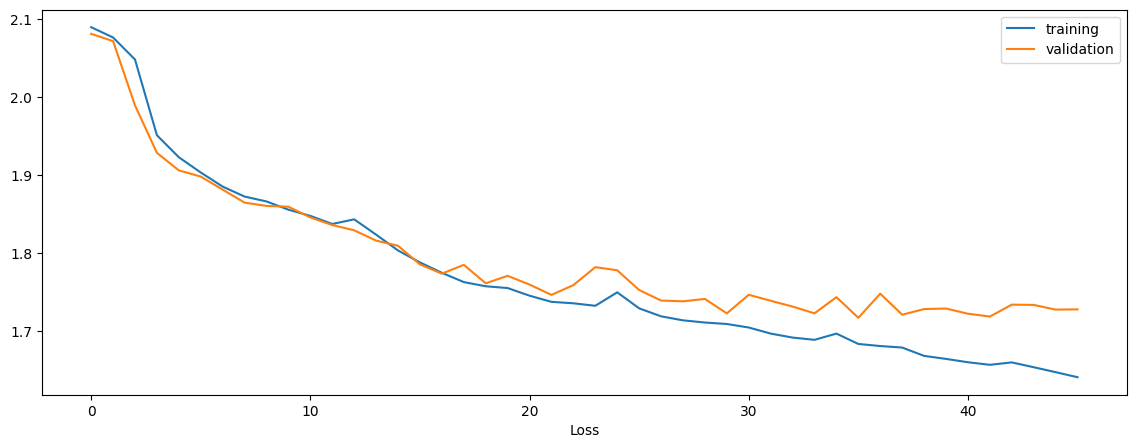

In [6]:
from util import pickleLoad
from visual import plotHistory

history = pickleLoad('source/data/models/{}.pkl'.format(HASH))
plotHistory(history)

In [7]:
from util import getAccuarcy, predictInBatches

print('balanced')
print(getAccuarcy(train[1],predictInBatches(model,train[0],architecture['batch_size'])))
print(getAccuarcy(val[1],predictInBatches(model,val[0],architecture['batch_size'])))
print(getAccuarcy(test[1],predictInBatches(model,test[0],architecture['batch_size'])))

balanced


0.34593730286128305


0.34620002350847146


0.2829094613575909


In [8]:
props2 = props.copy()
props2['balance_data'] = False
gen2 = DataGenerator(**props2)
gen2.clonePCA(gen)
train2, val2, test2 = gen2.getData()

print('original')
print(getAccuarcy(train2[1],predictInBatches(model,train2[0],architecture['batch_size'])))
print(getAccuarcy(val2[1],predictInBatches(model,val2[0],architecture['batch_size'])))
print(getAccuarcy(test2[1],predictInBatches(model,test2[0],architecture['batch_size'])))

original


0.3051790765438735


0.301179625883583


0.27837977933009156


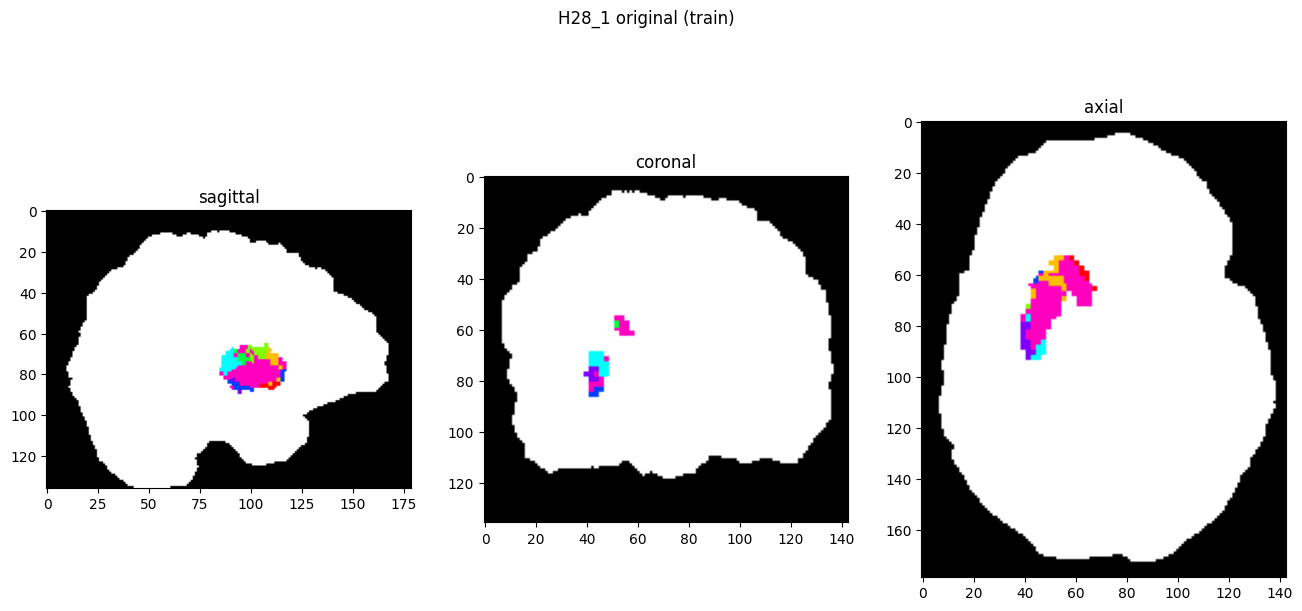

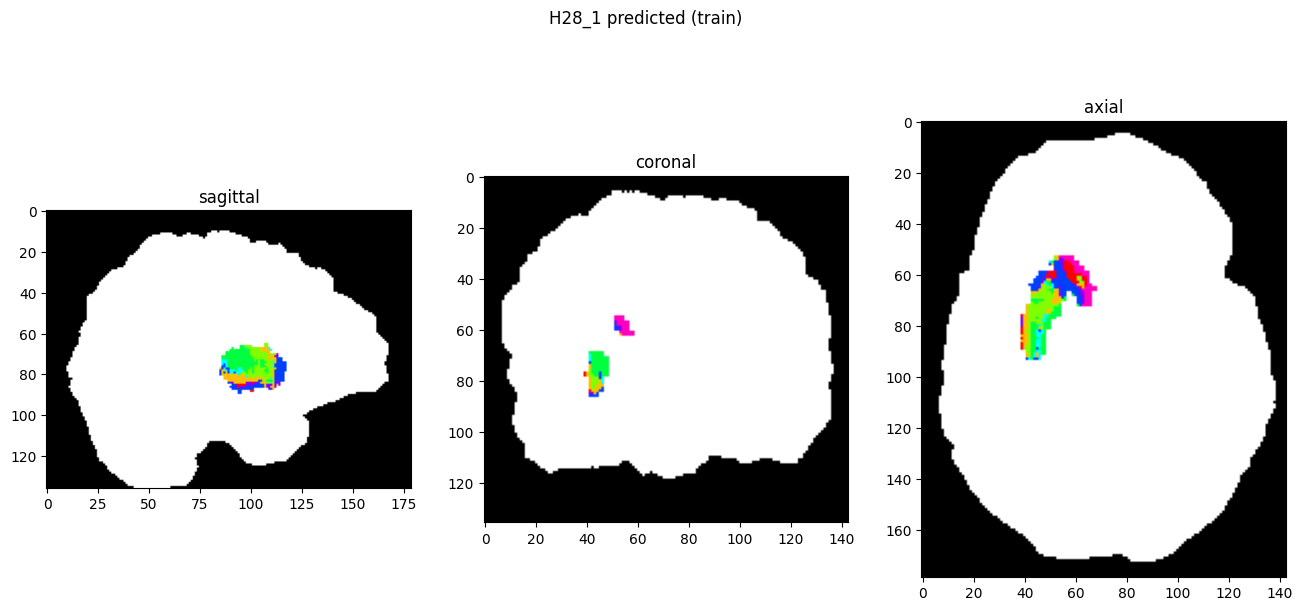

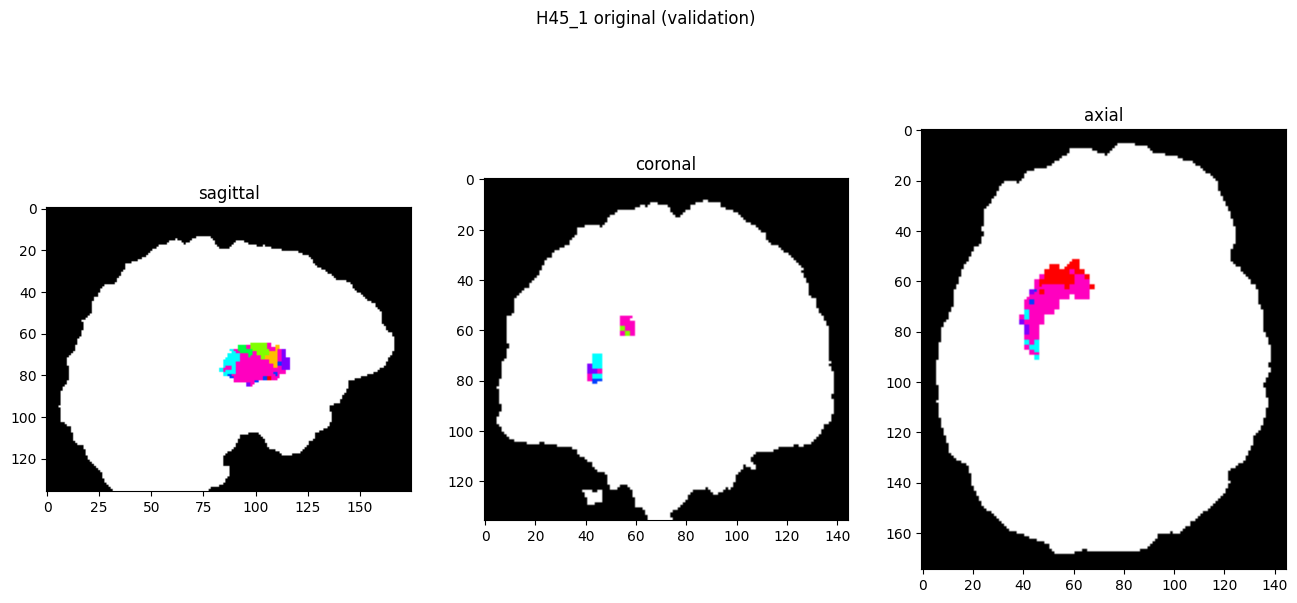

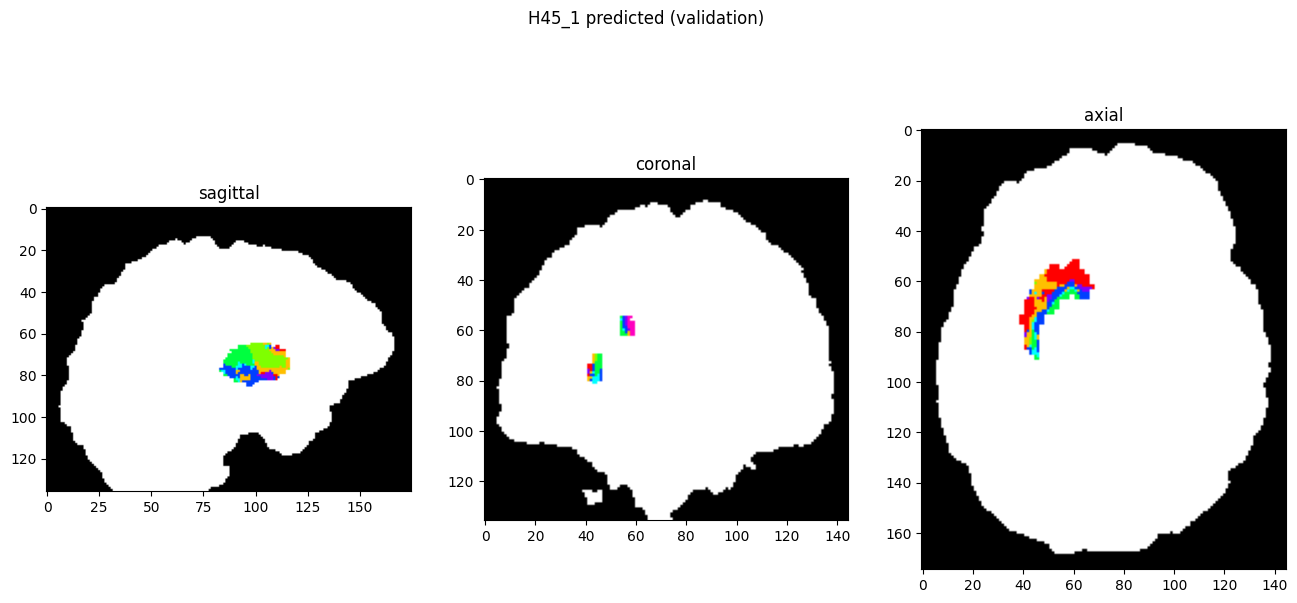

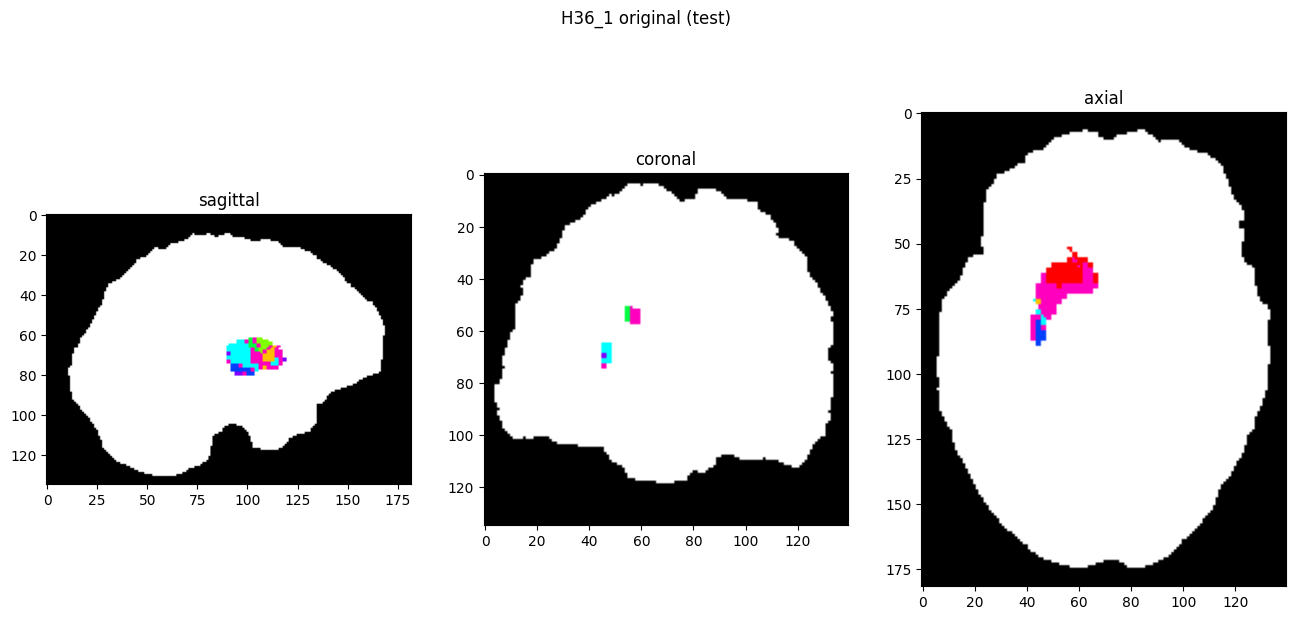

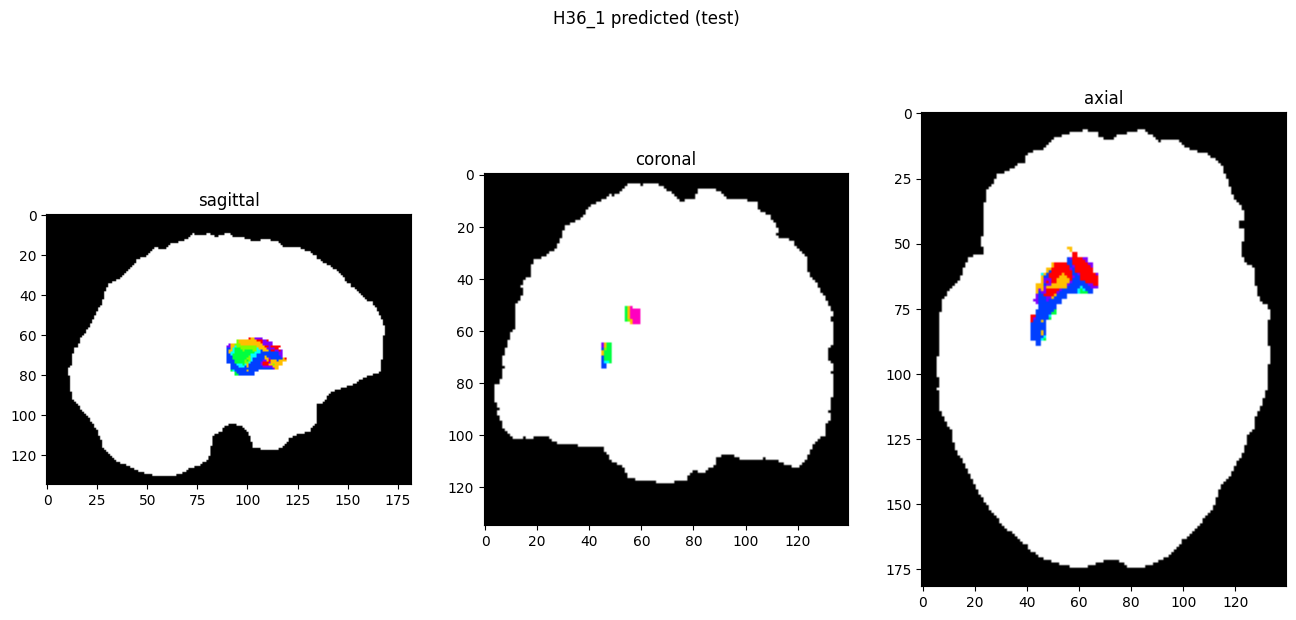

In [9]:
showResults(model, gen, threshold=0)